# VISUALIZACION DE NULOS Y UNIVARIADOS

### LIBRERIAS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import squarify
from matplotlib import gridspec

df = pd.read_csv('/loan_train.csv')

### DEFINIENDO LA FUNCION

Columnas numéricas con nulos: ['mths_since_last_delinq', 'mths_since_last_record', 'pub_rec_bankruptcies']


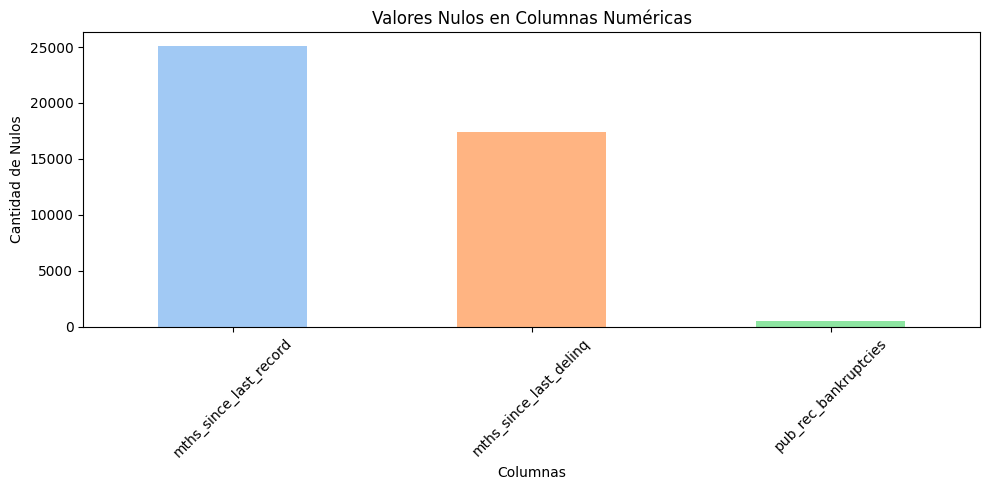

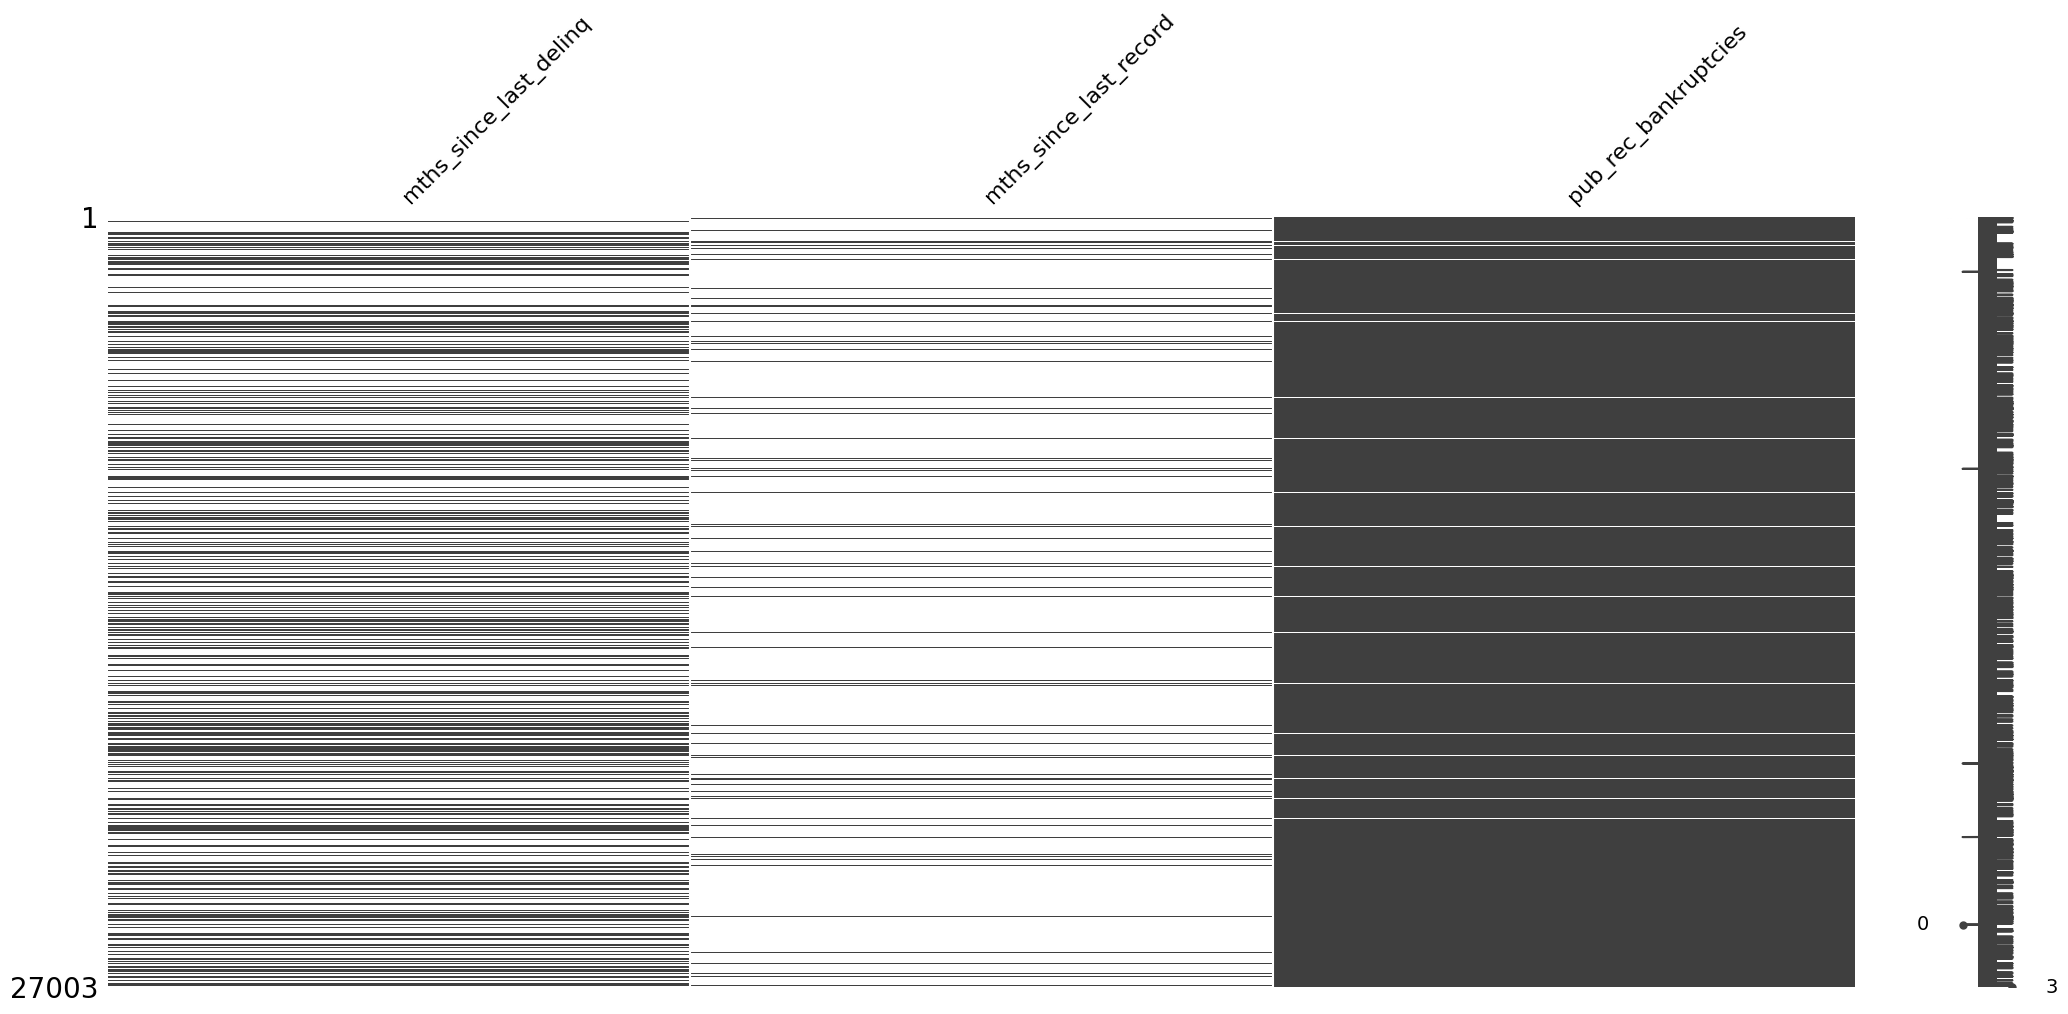

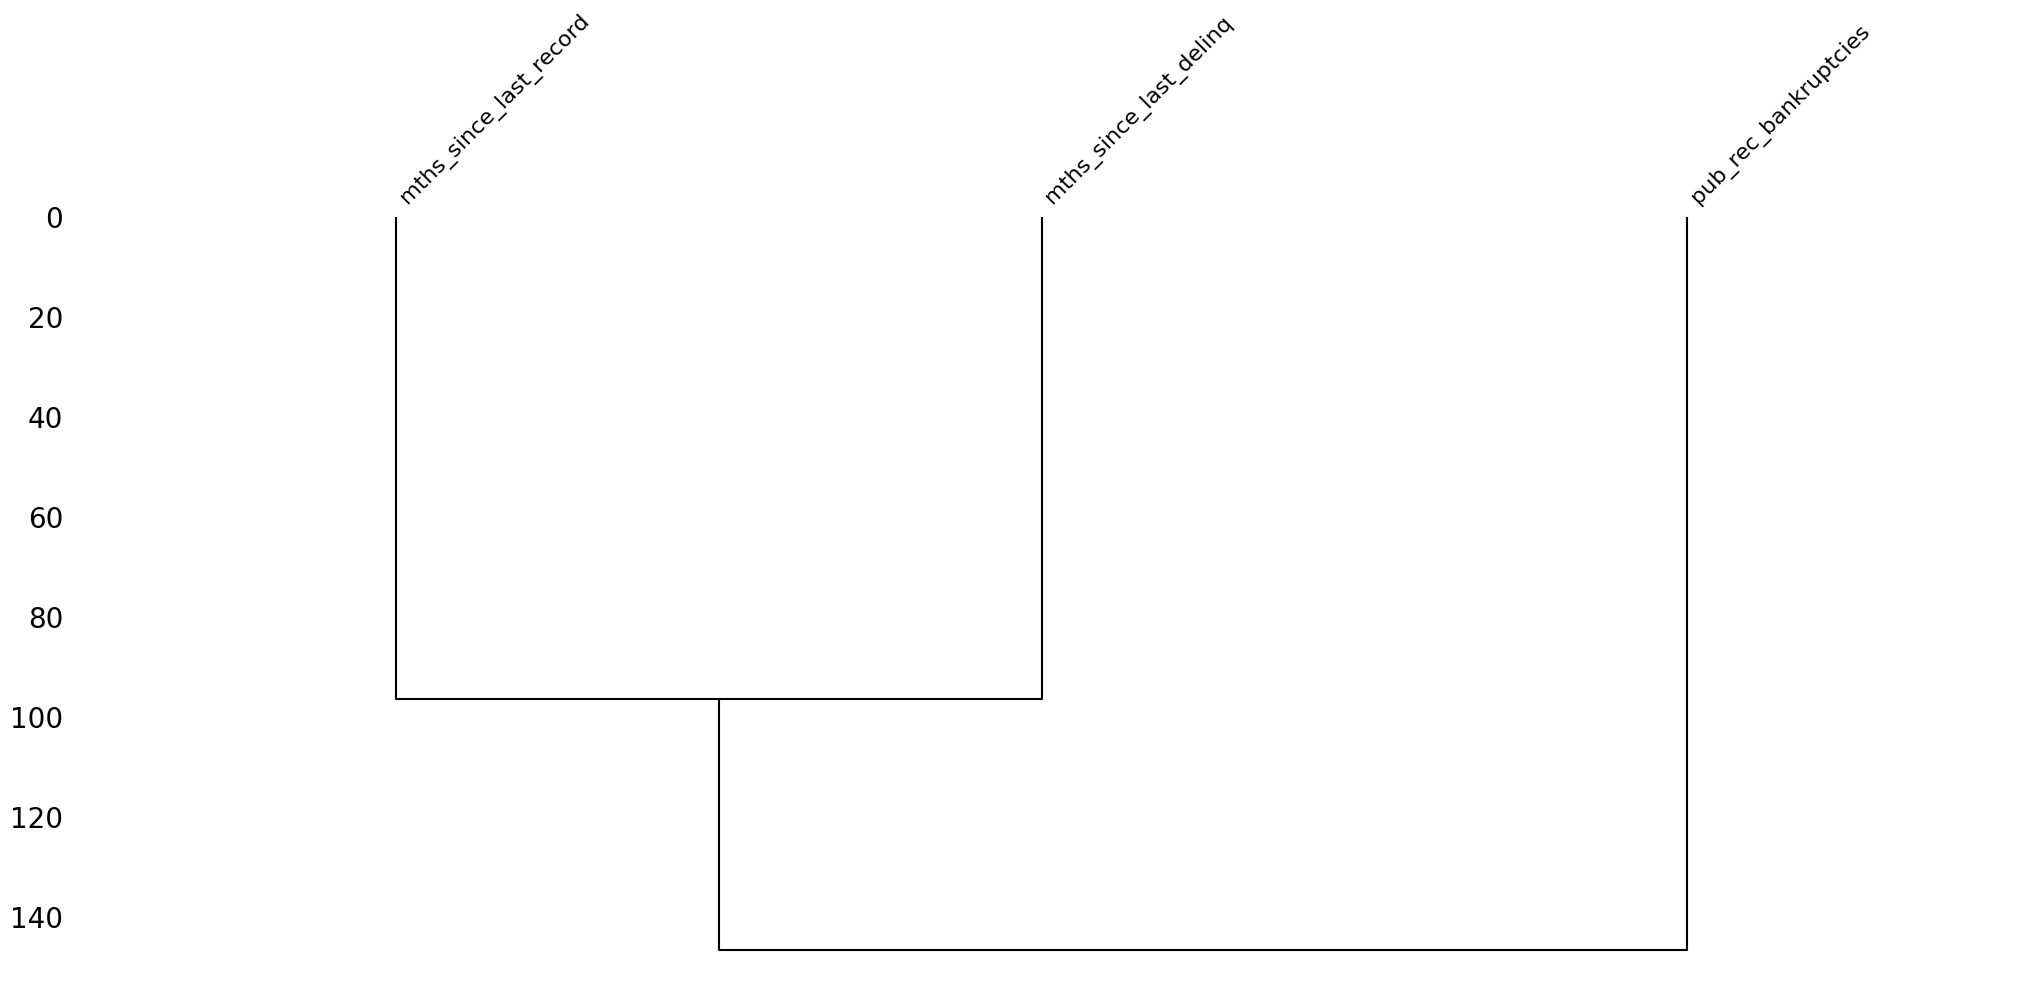

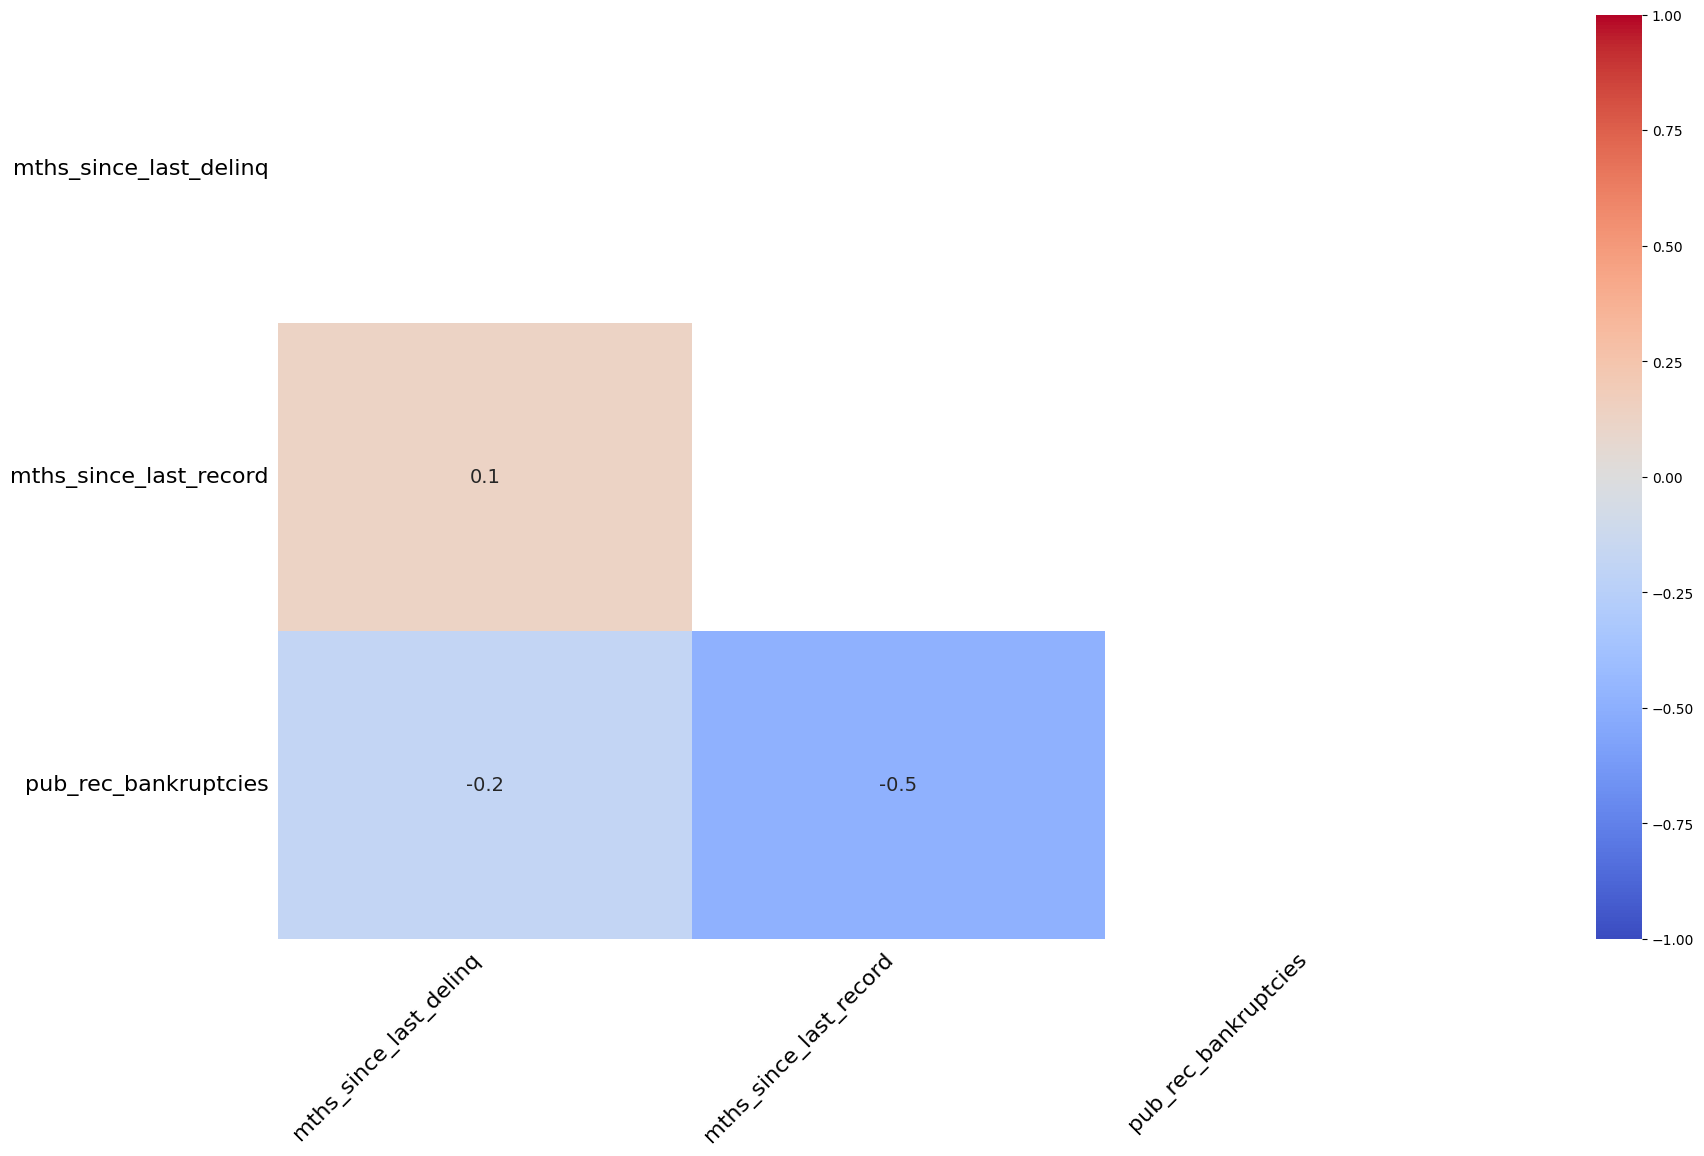

Columnas categóricas con nulos: ['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


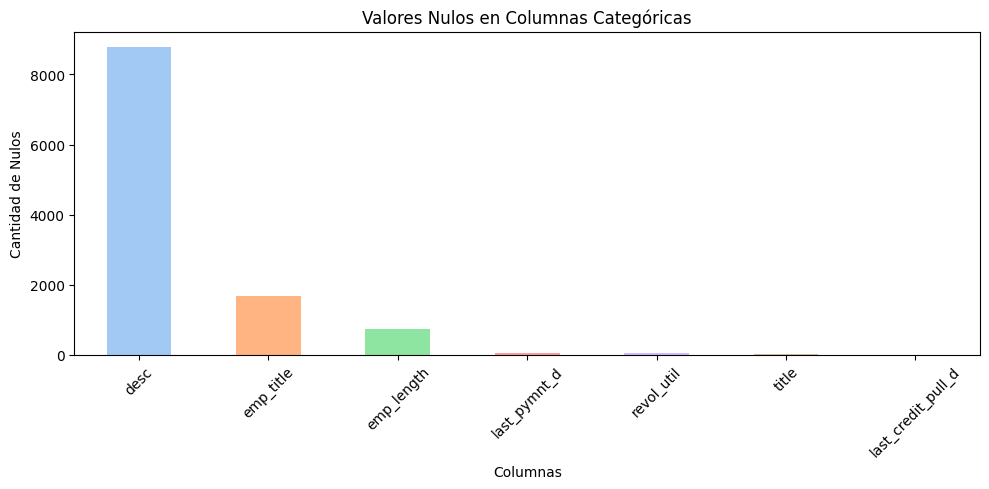

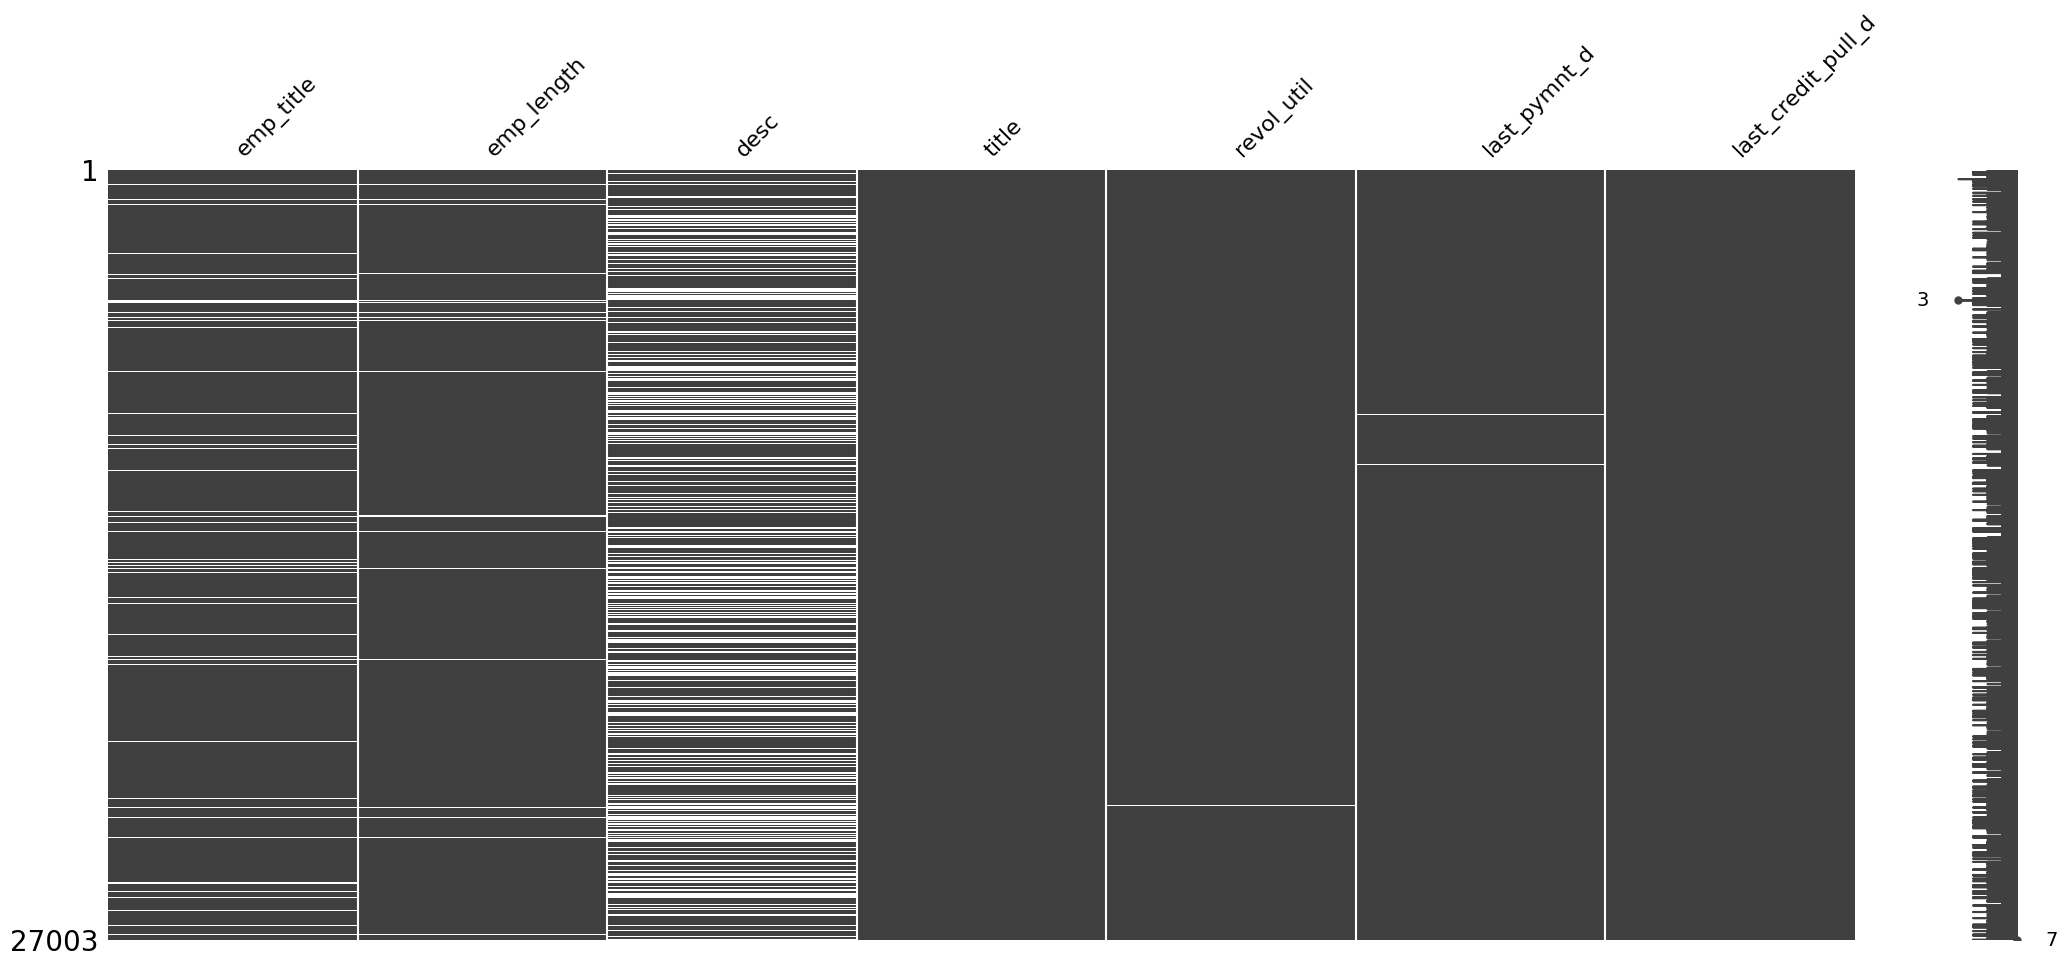

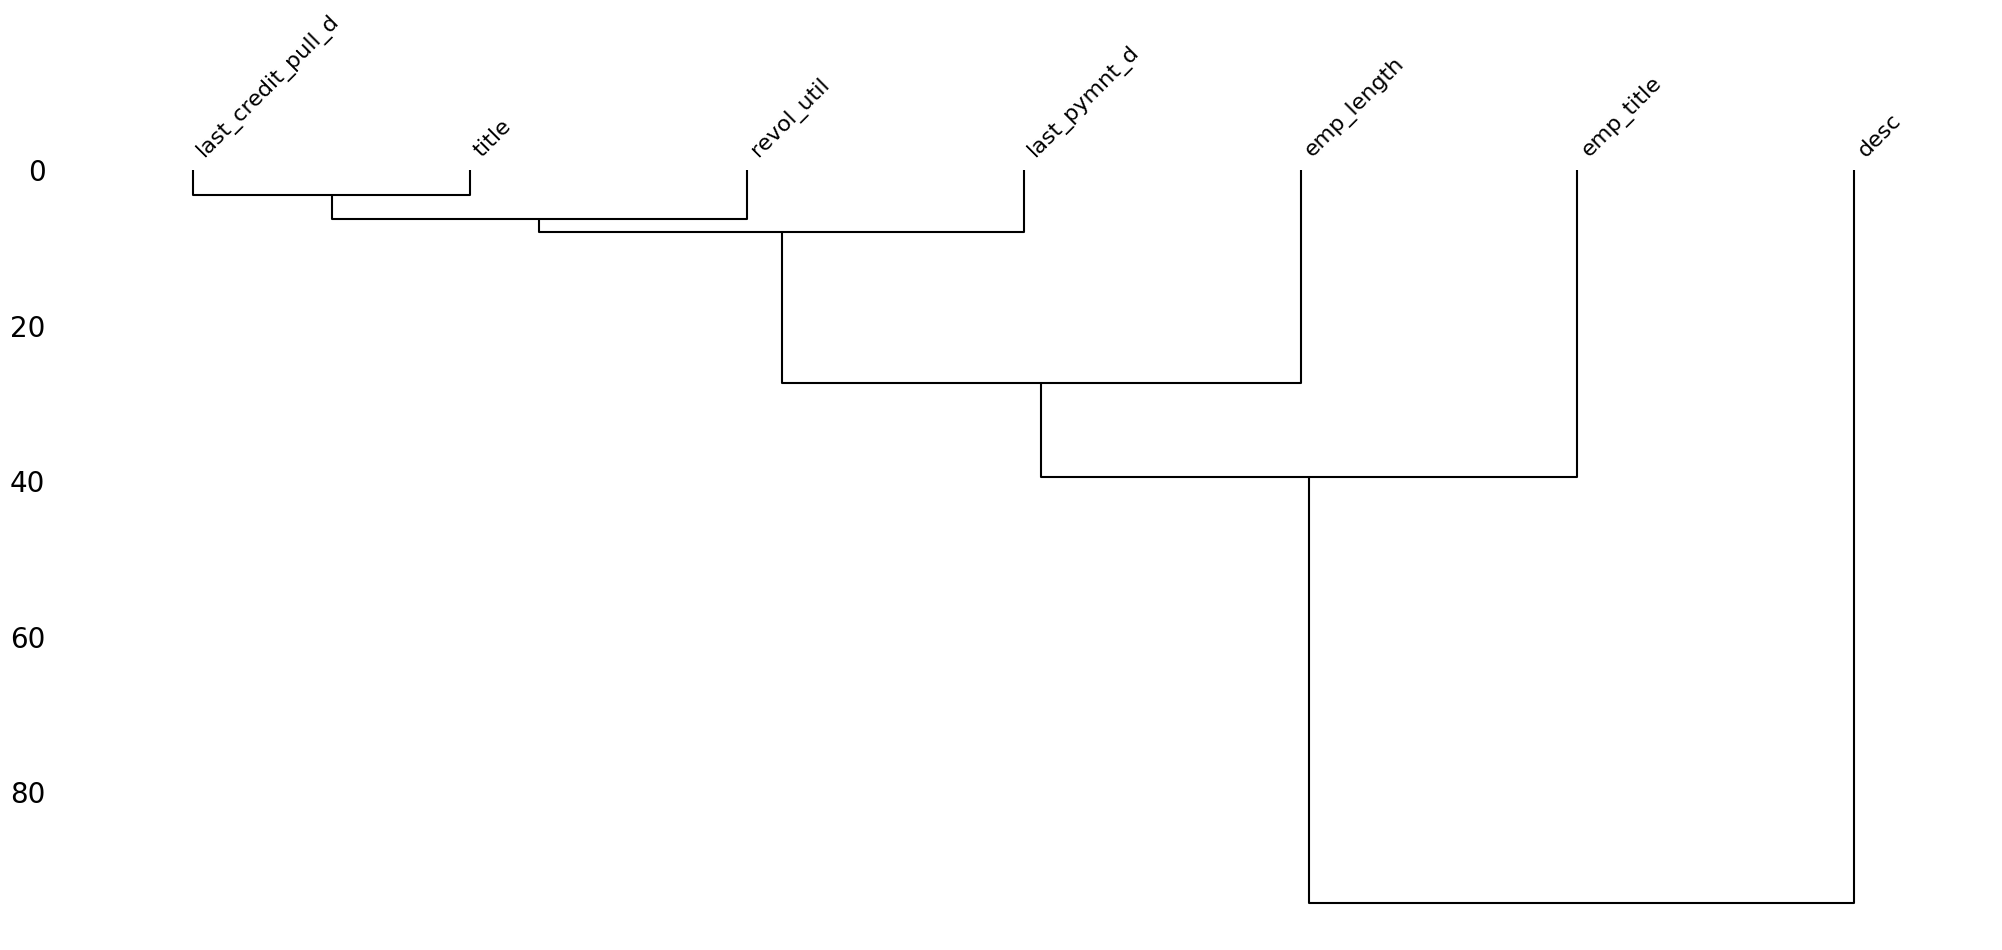

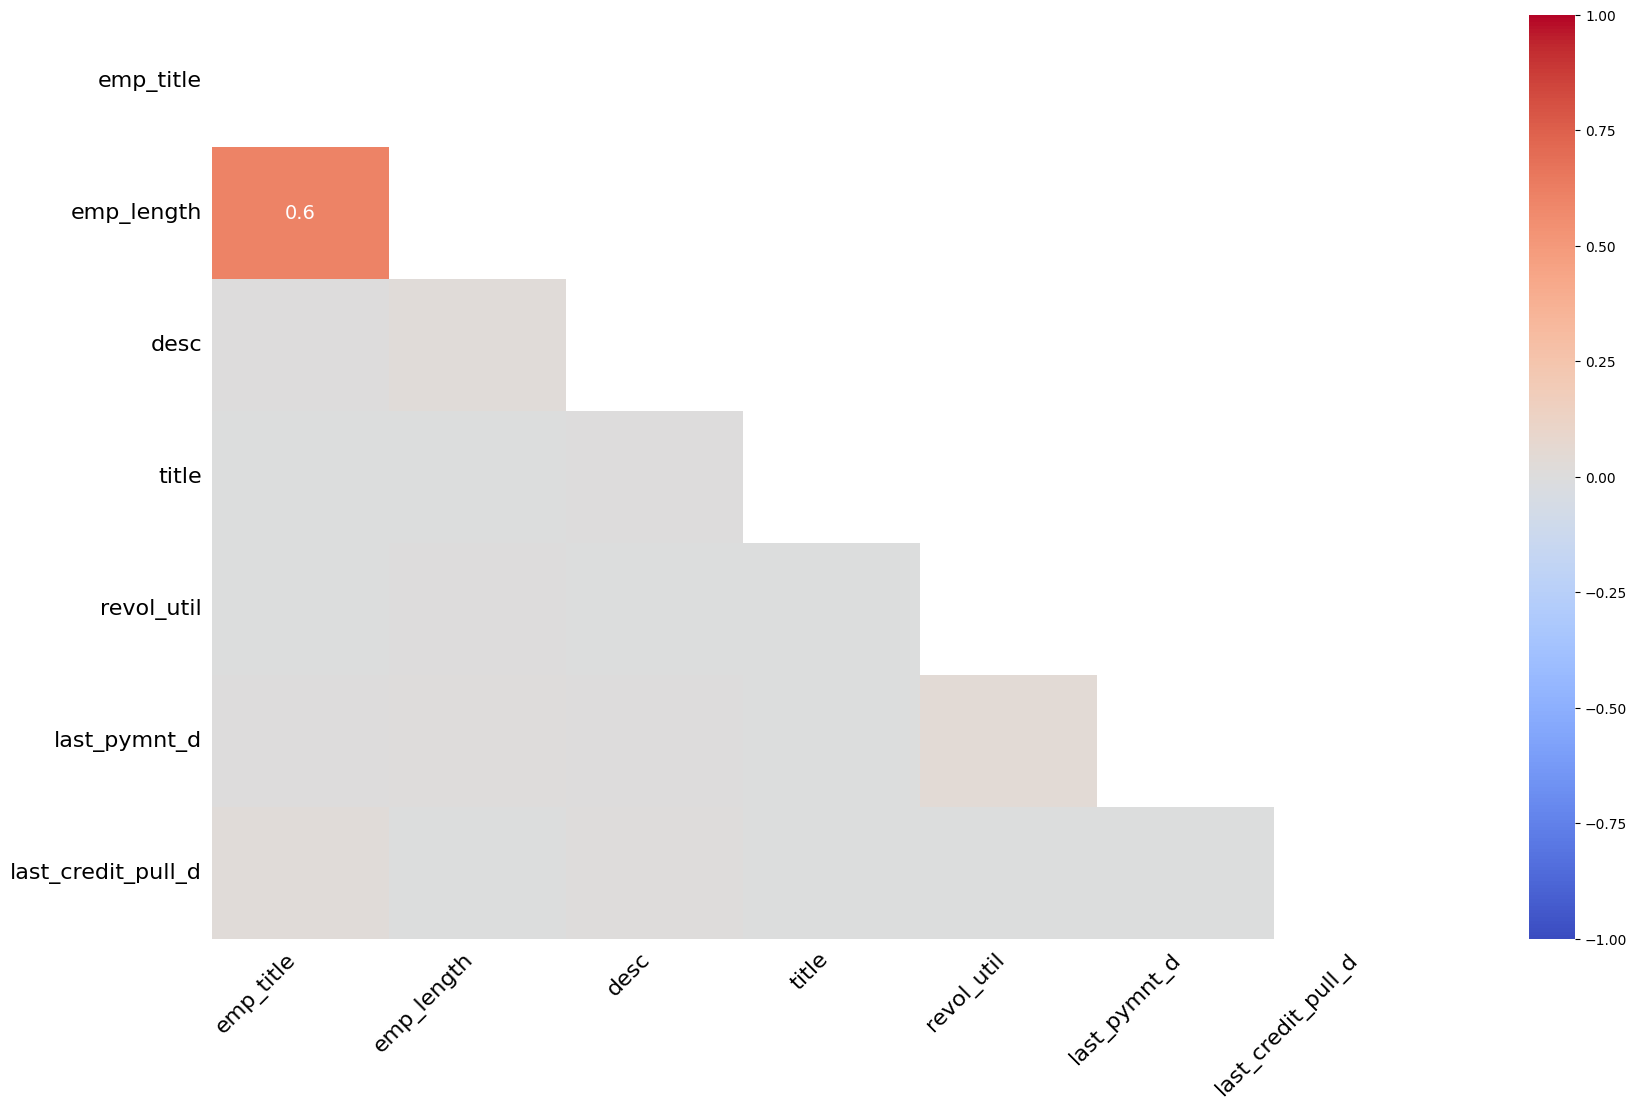

In [21]:
def analizar_nulos(df, variables=None):
    if variables is not None:
        df = df[variables]  # Filtra solo las columnas indicadas

    # NUMÉRICAS CON NULOS
    df_num = df.select_dtypes(include=[np.number])
    df_num_nulos = df_num.loc[:, df_num.isnull().any()]

    if not df_num_nulos.empty:
        print(f"Columnas numéricas con nulos: {list(df_num_nulos.columns)}")

        plt.figure(figsize=(10, 5))
        df_num_nulos.isnull().sum().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("pastel"))
        plt.title('Valores Nulos en Columnas Numéricas')
        plt.xlabel('Columnas')
        plt.ylabel('Cantidad de Nulos')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        msno.matrix(df_num_nulos)
        plt.show()

        if df_num_nulos.shape[1] > 1:
            msno.dendrogram(df_num_nulos)
            plt.show()

            msno.heatmap(df_num_nulos, cmap='coolwarm')
            plt.show()
        else:
            print("No se puede generar heatmap/dendrogram: menos de 2 columnas numéricas con nulos.")

    else:
        print("No hay columnas numéricas con nulos.")

    # CATEGÓRICAS CON NULOS
    df_cat = df.select_dtypes(include=['object', 'category'])
    df_cat_nulos = df_cat.loc[:, df_cat.isnull().any()]

    if not df_cat_nulos.empty:
        print(f"Columnas categóricas con nulos: {list(df_cat_nulos.columns)}")

        plt.figure(figsize=(10, 5))
        df_cat_nulos.isnull().sum().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("pastel"))
        plt.title('Valores Nulos en Columnas Categóricas')
        plt.xlabel('Columnas')
        plt.ylabel('Cantidad de Nulos')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        msno.matrix(df_cat_nulos)
        plt.show()

        if df_cat_nulos.shape[1] > 1:
            msno.dendrogram(df_cat_nulos)
            plt.show()

            msno.heatmap(df_cat_nulos, cmap='coolwarm')
            plt.show()
        else:
            print("No se puede generar heatmap/dendrogram: menos de 2 columnas categóricas con nulos.")

    else:
        print("No hay columnas categóricas con nulos.")

analizar_nulos(df, variables=None)

### Definiendo las Variables

In [22]:
variables = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'total_pymnt',
    'total_pymnt_inv',
    'grade',
    'sub_grade',
    'emp_length'
]

Columnas numéricas con nulos: ['mths_since_last_delinq', 'mths_since_last_record', 'pub_rec_bankruptcies']


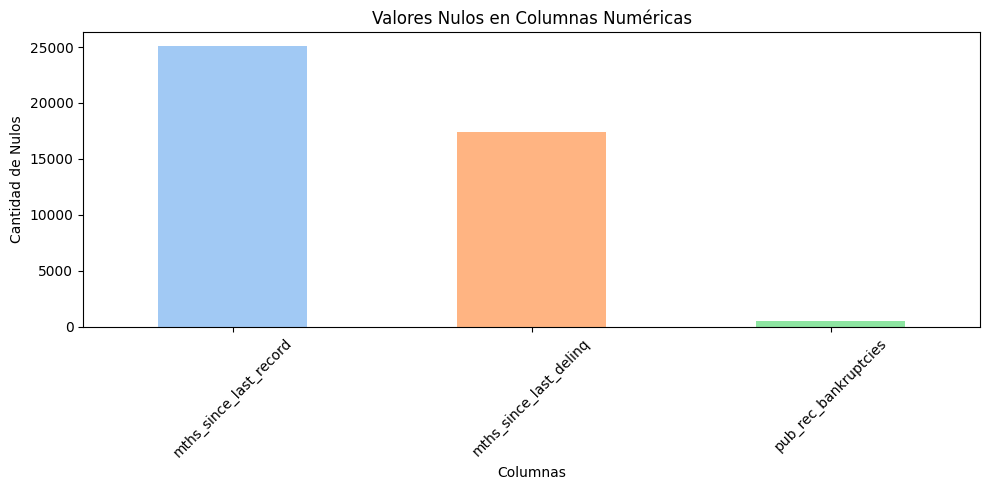

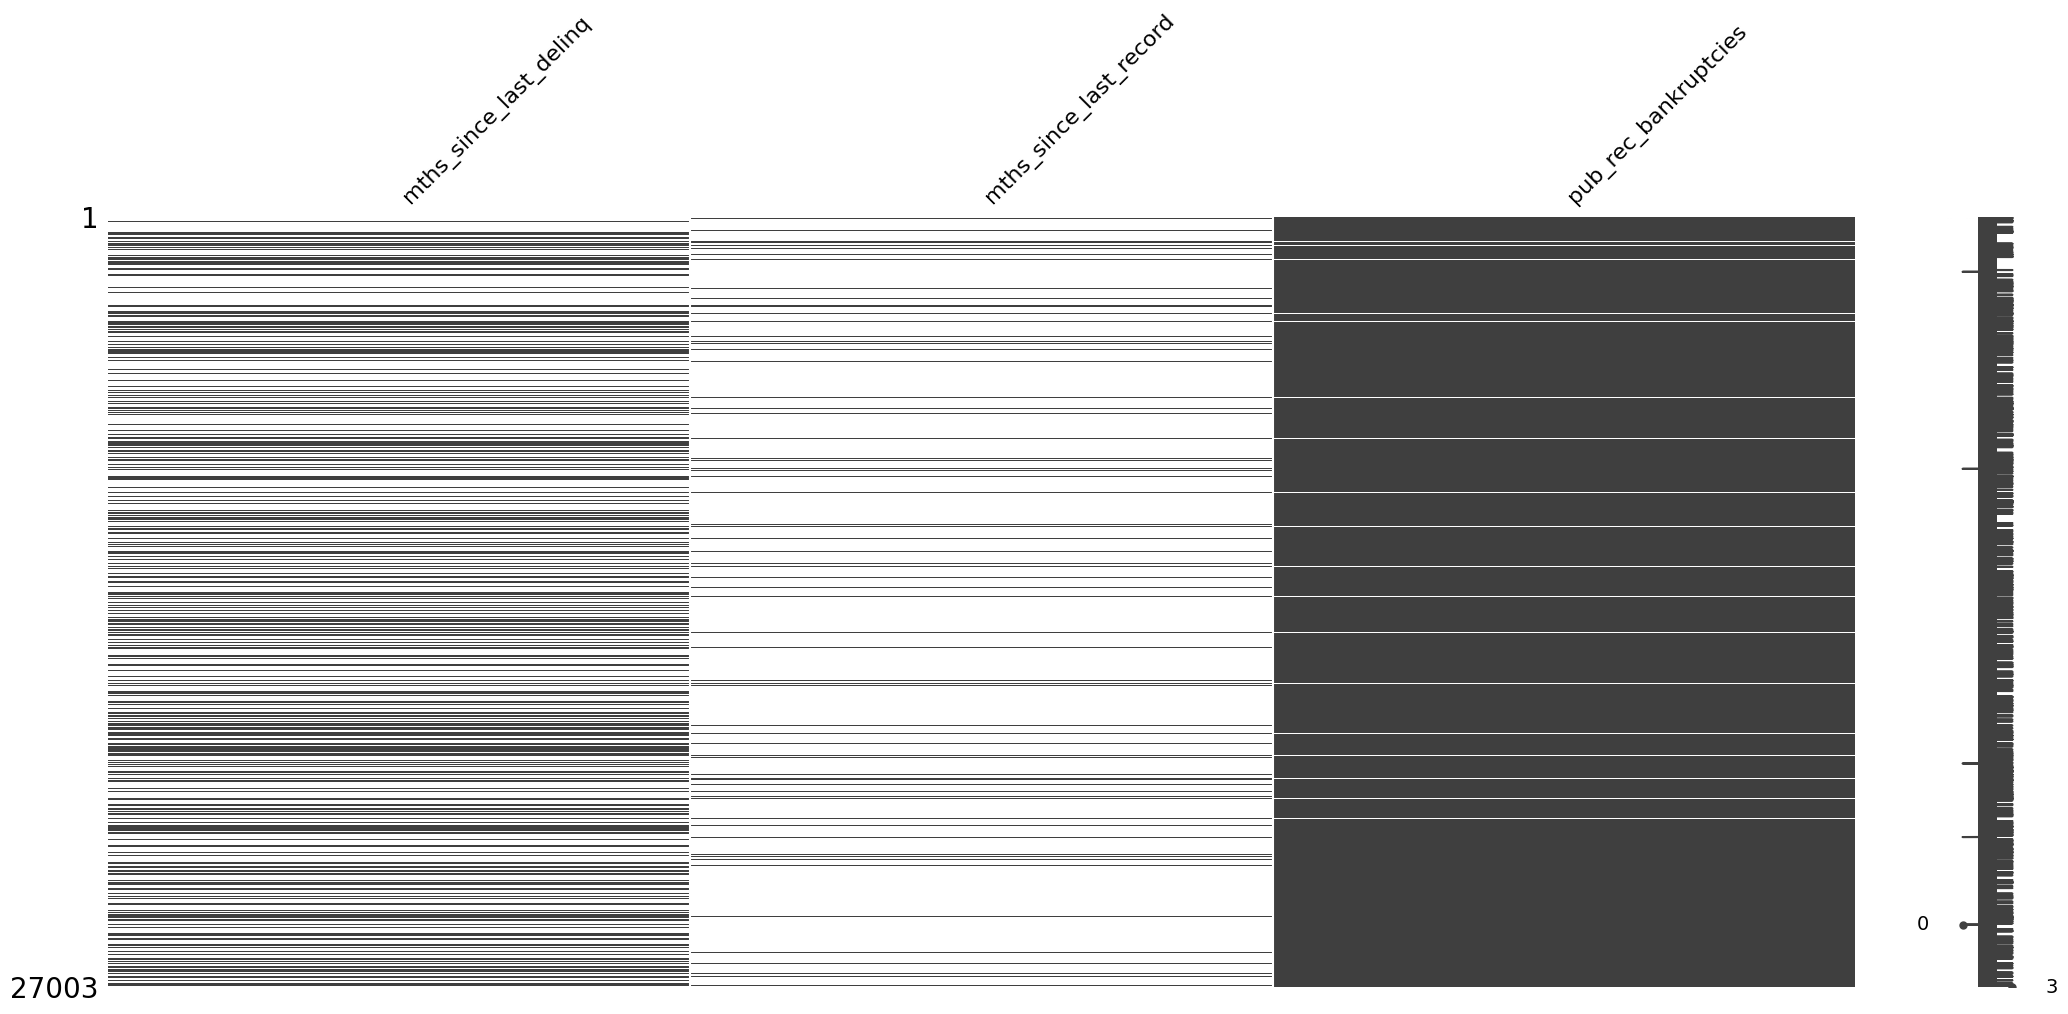

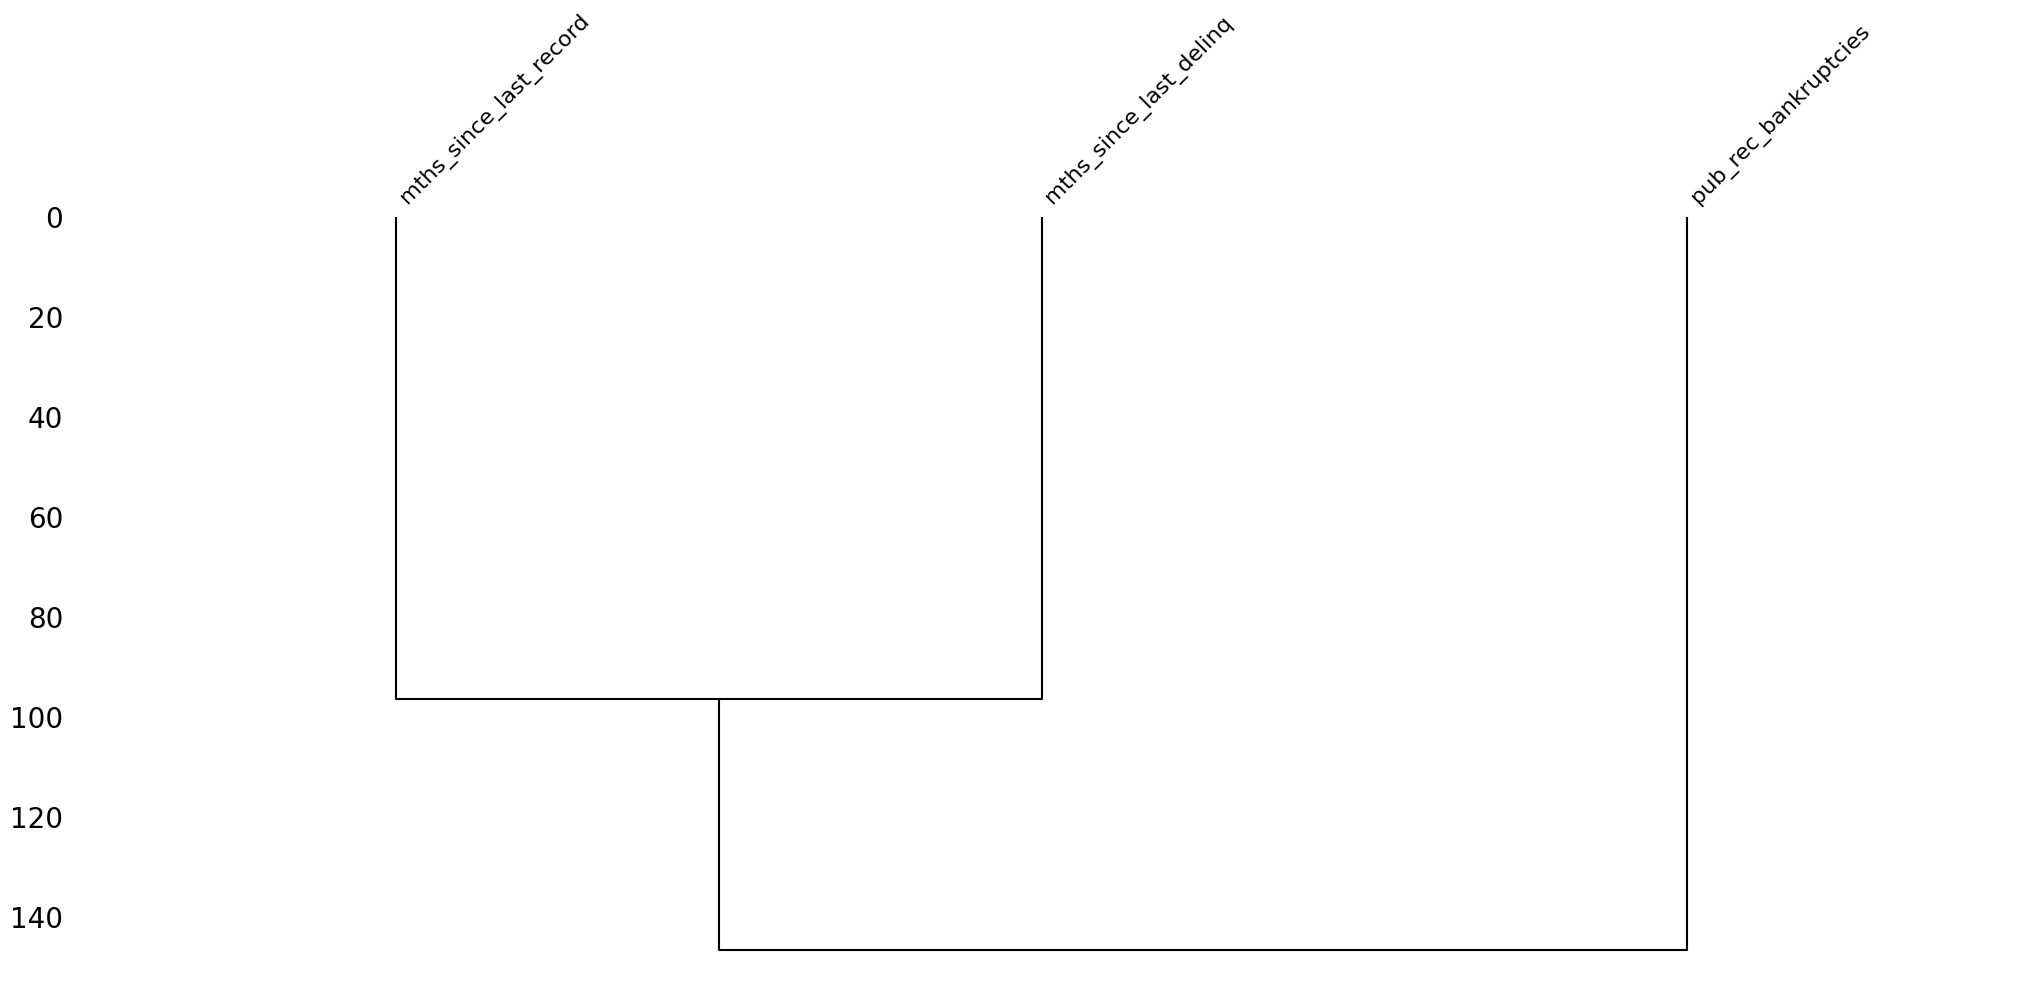

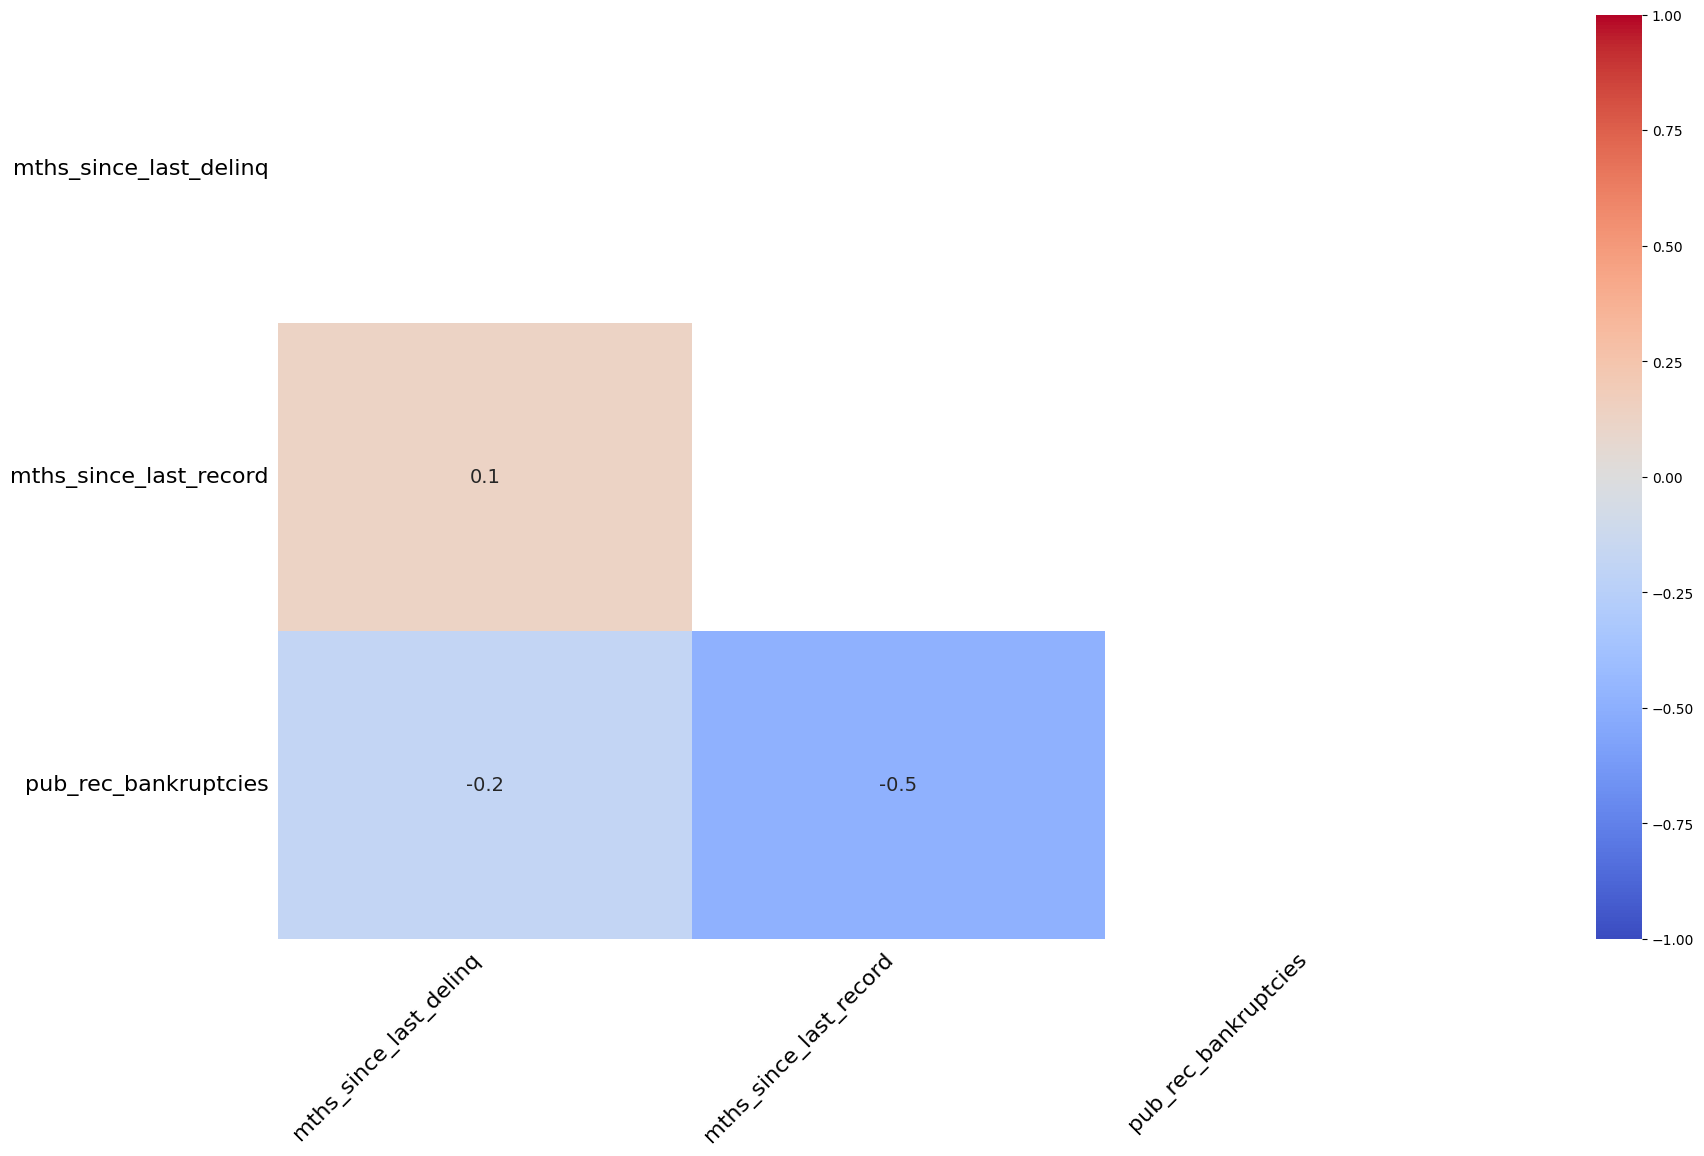

Columnas categóricas con nulos: ['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


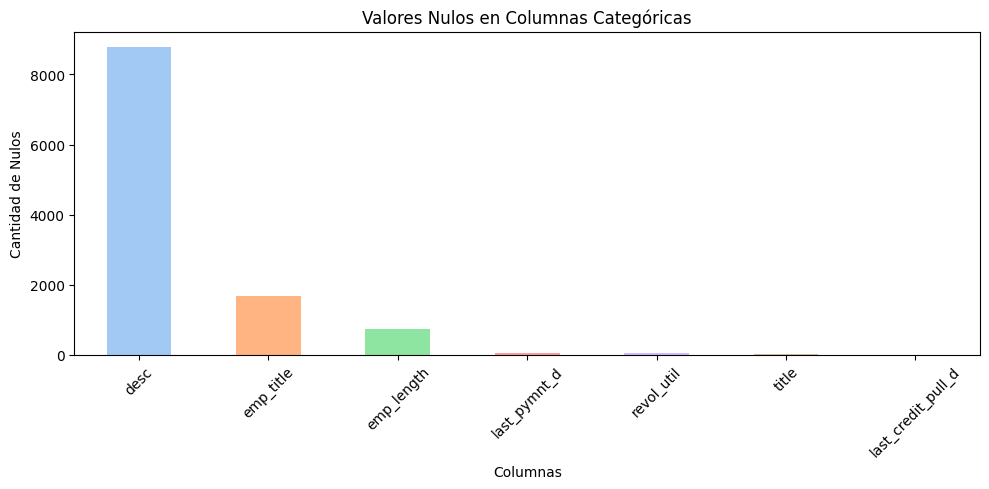

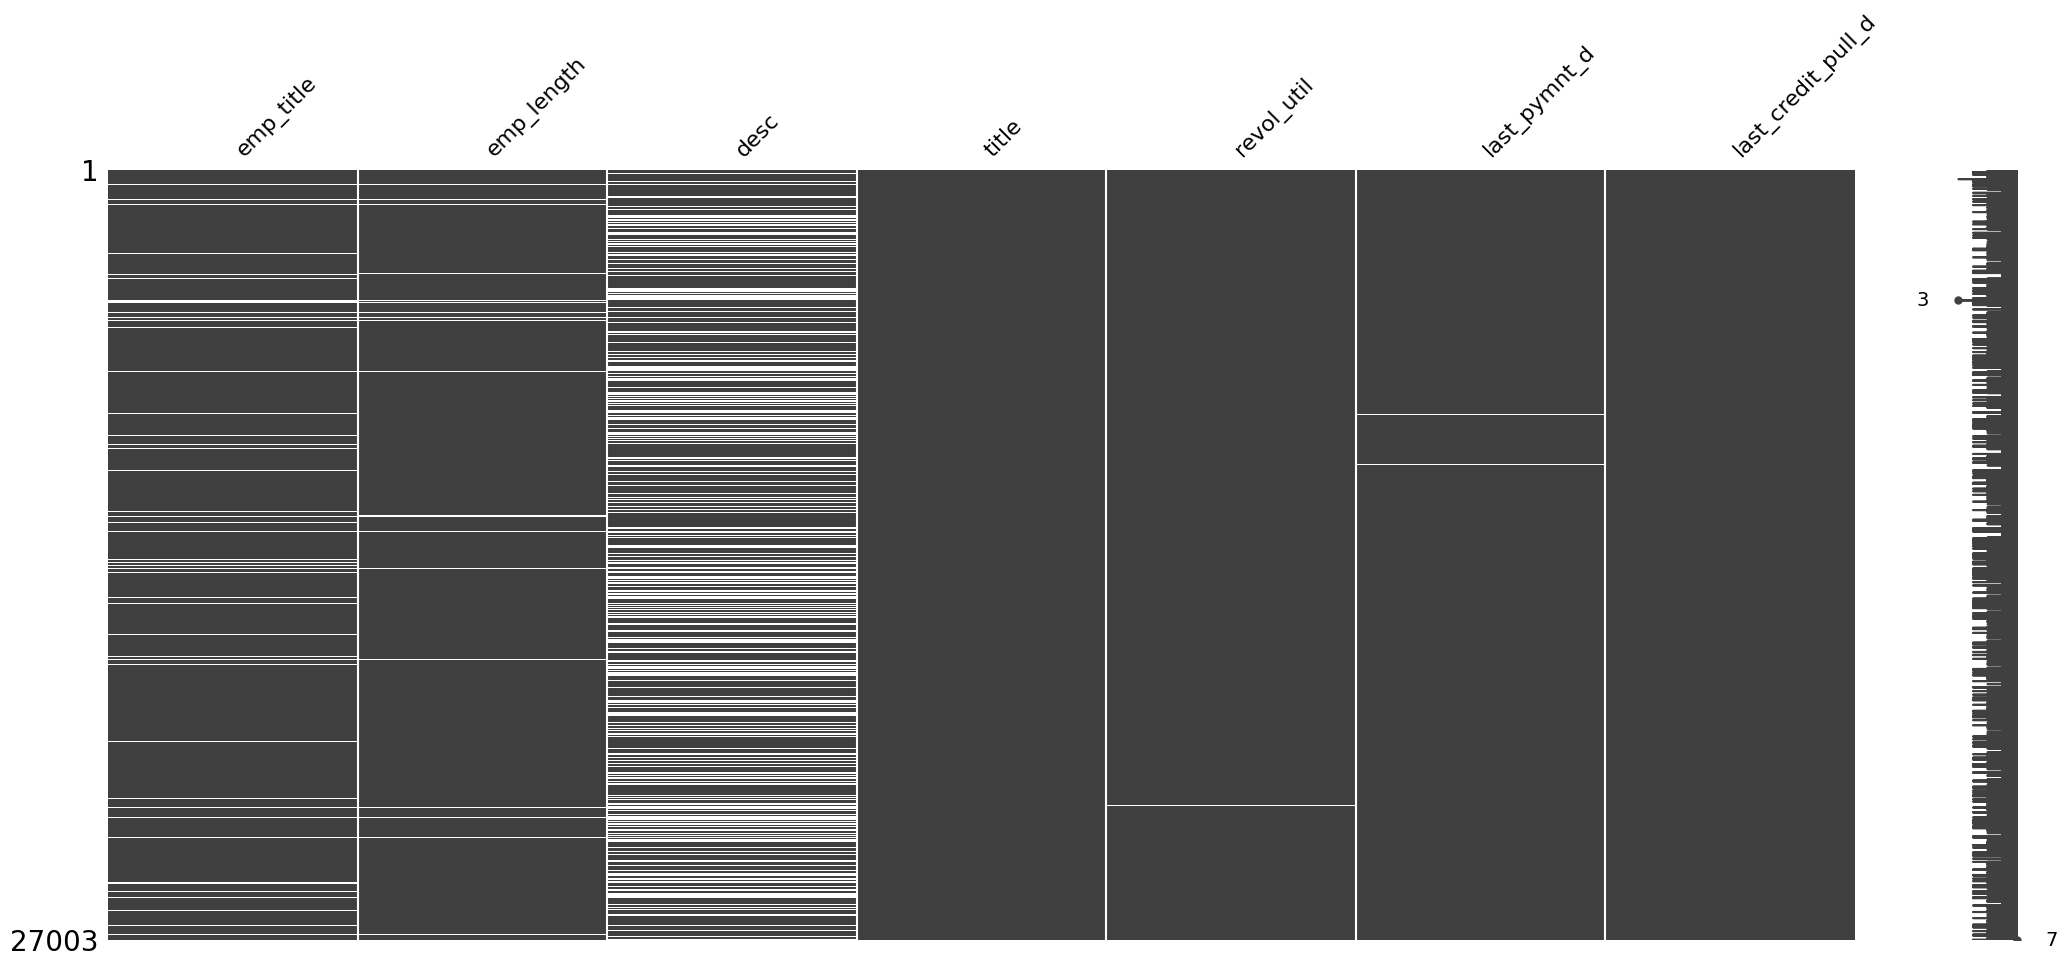

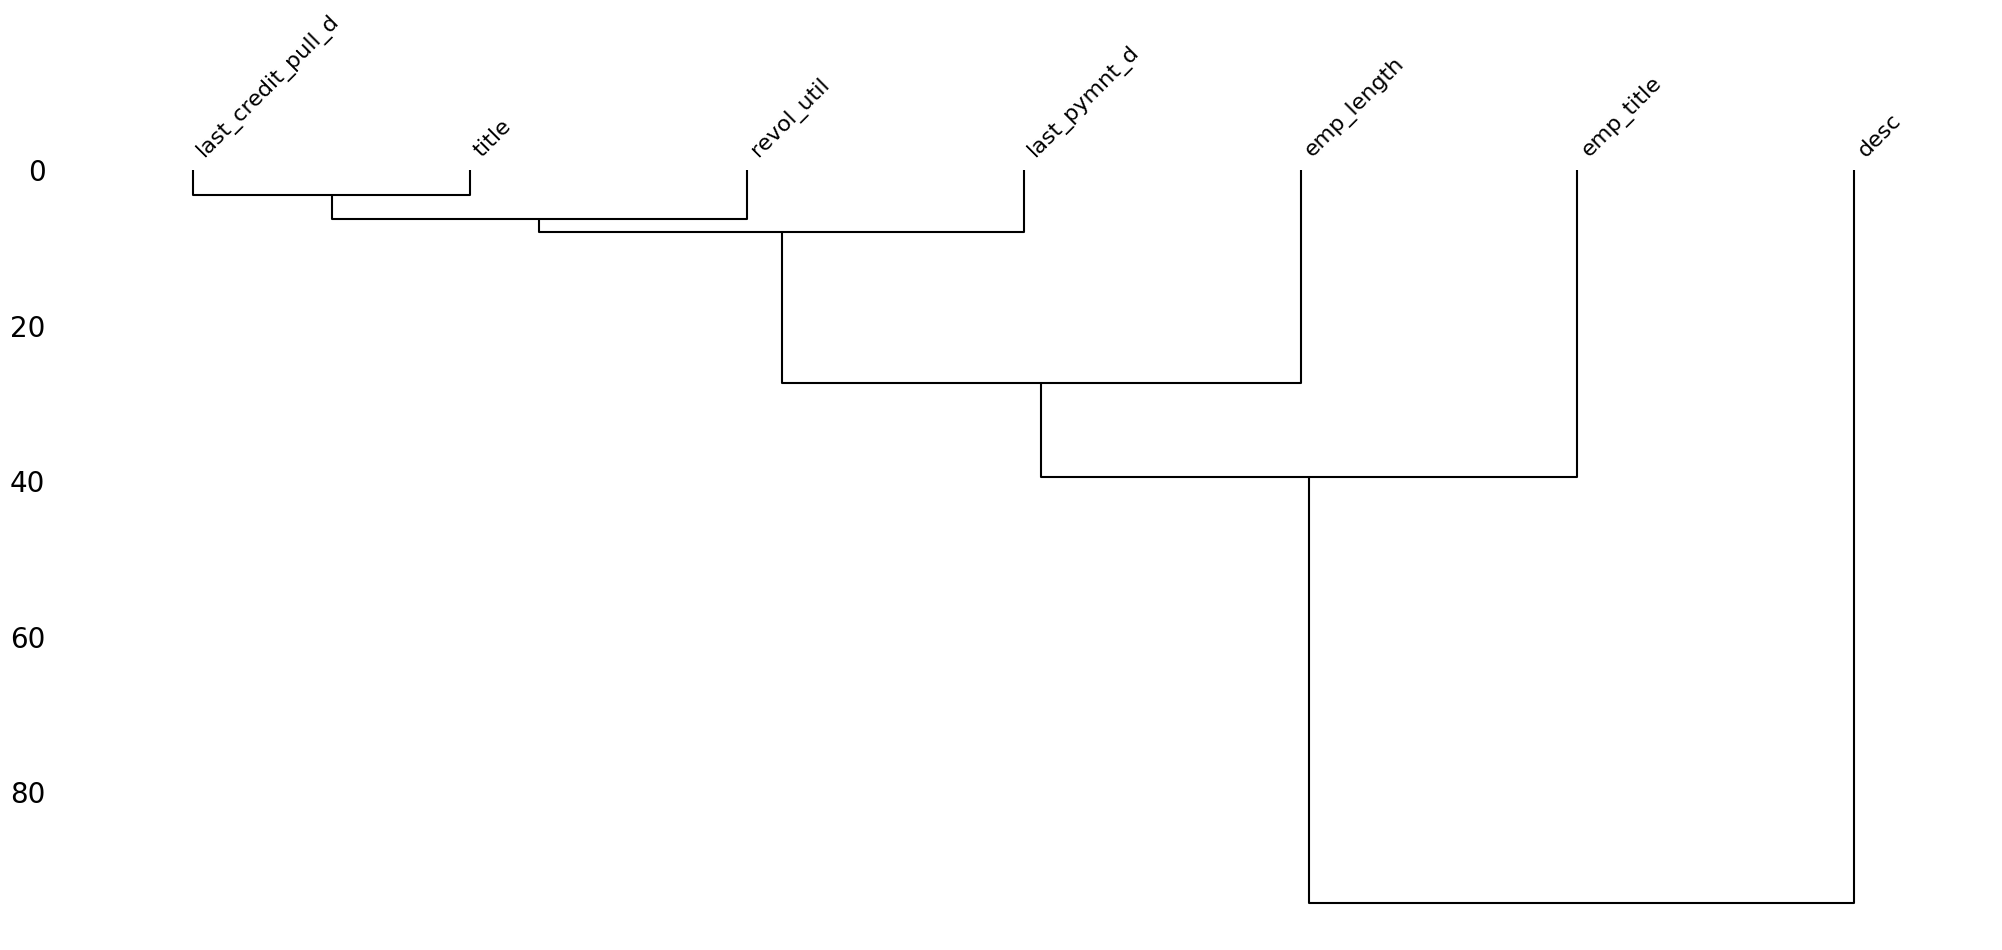

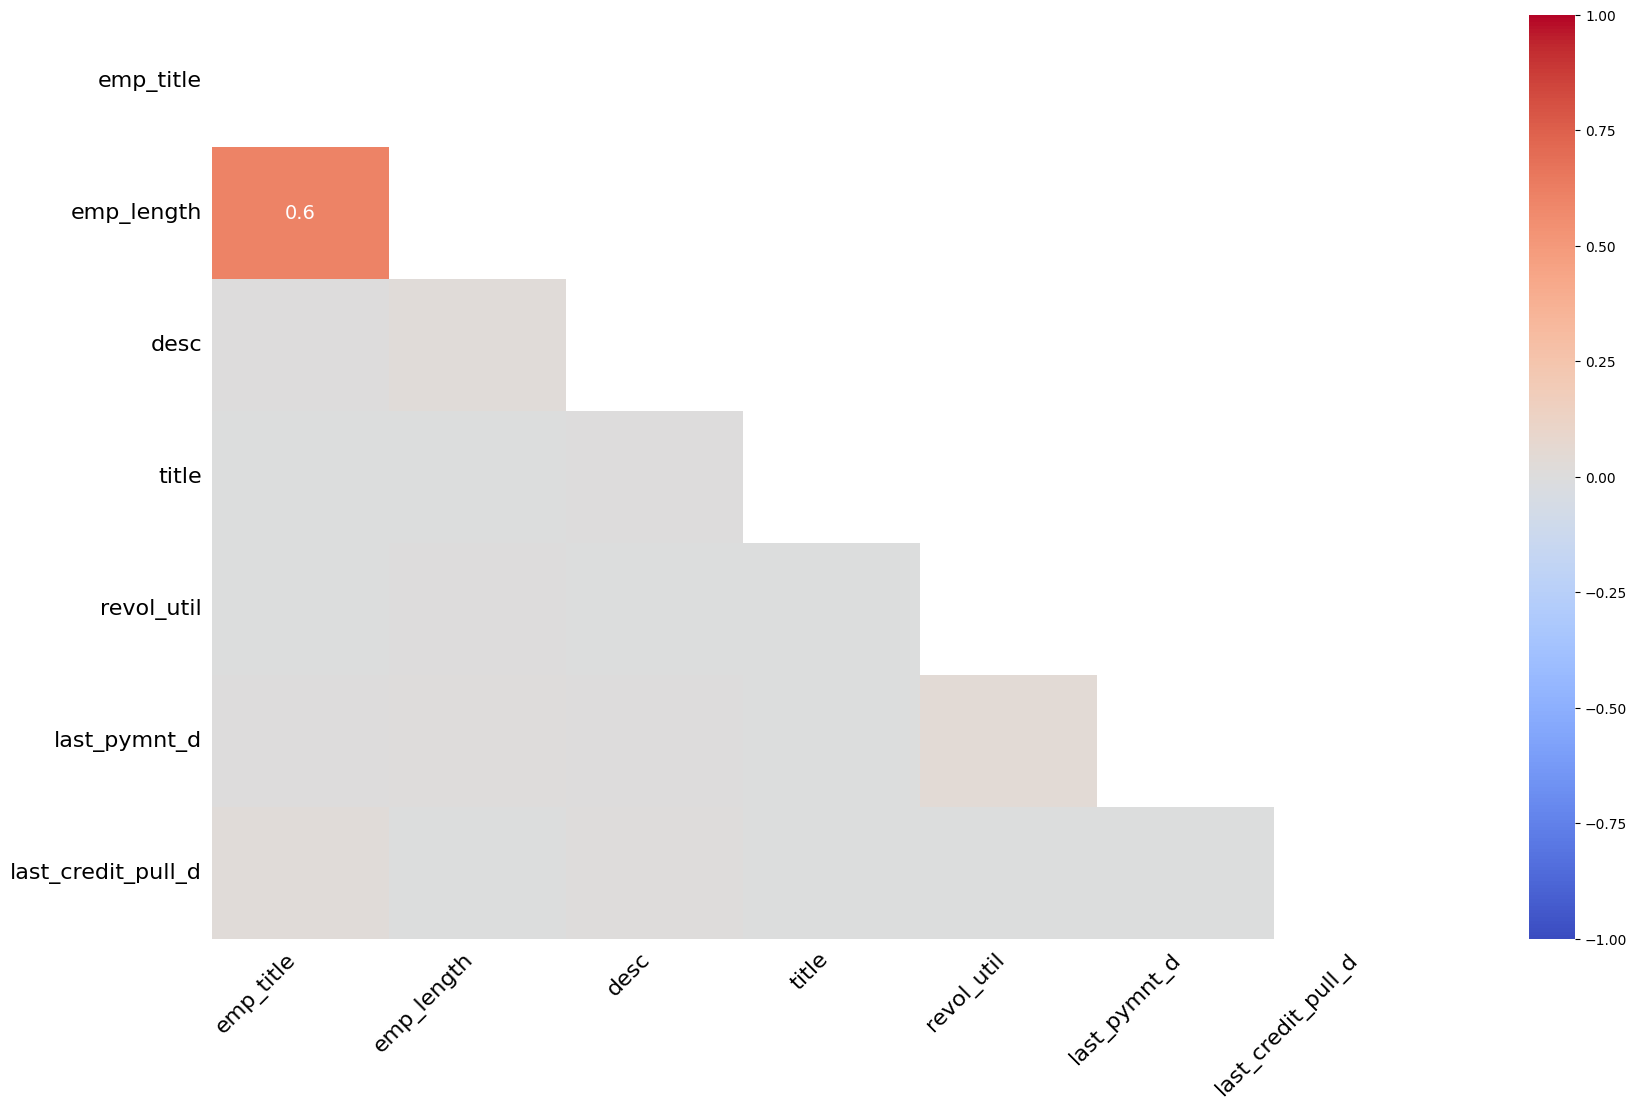

In [23]:
#### USANDO LA FUNCION

analizar_nulos(df, variables=None)

Columnas numéricas con nulos: ['mths_since_last_delinq', 'mths_since_last_record']


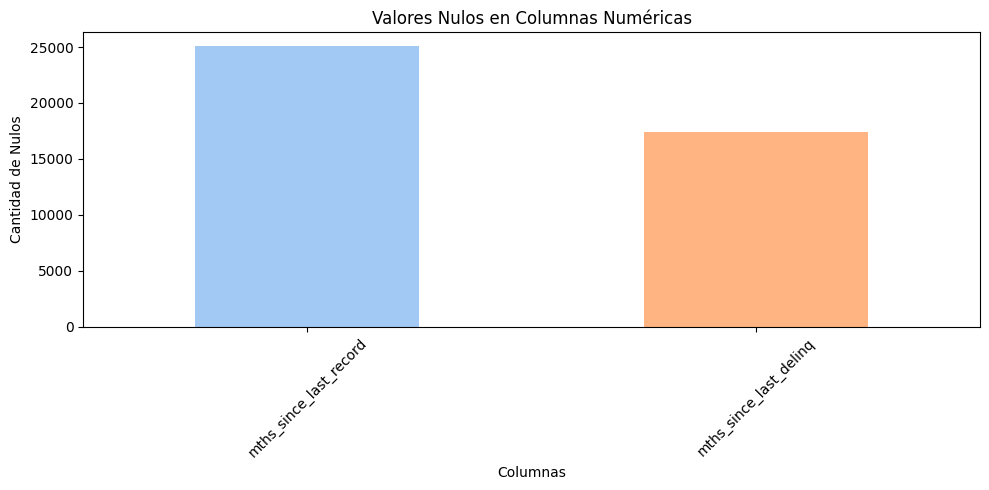

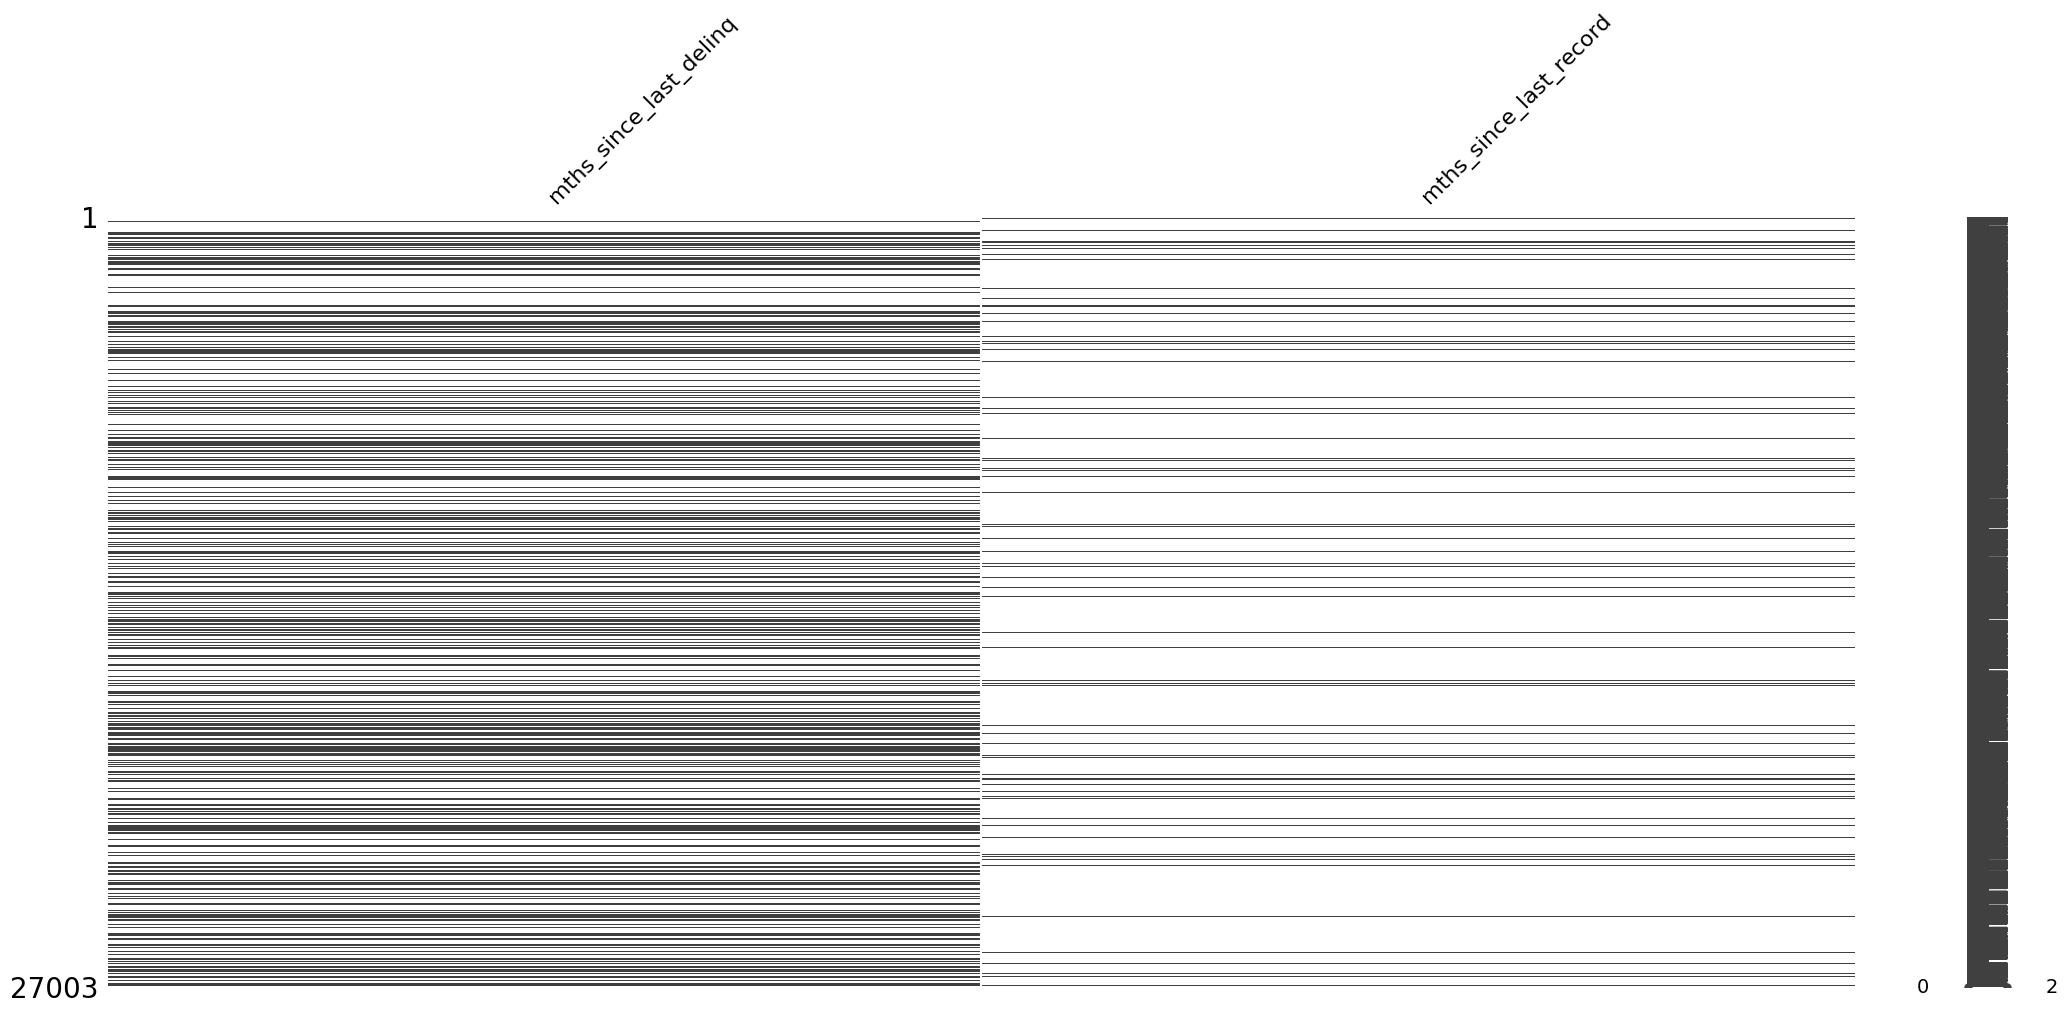

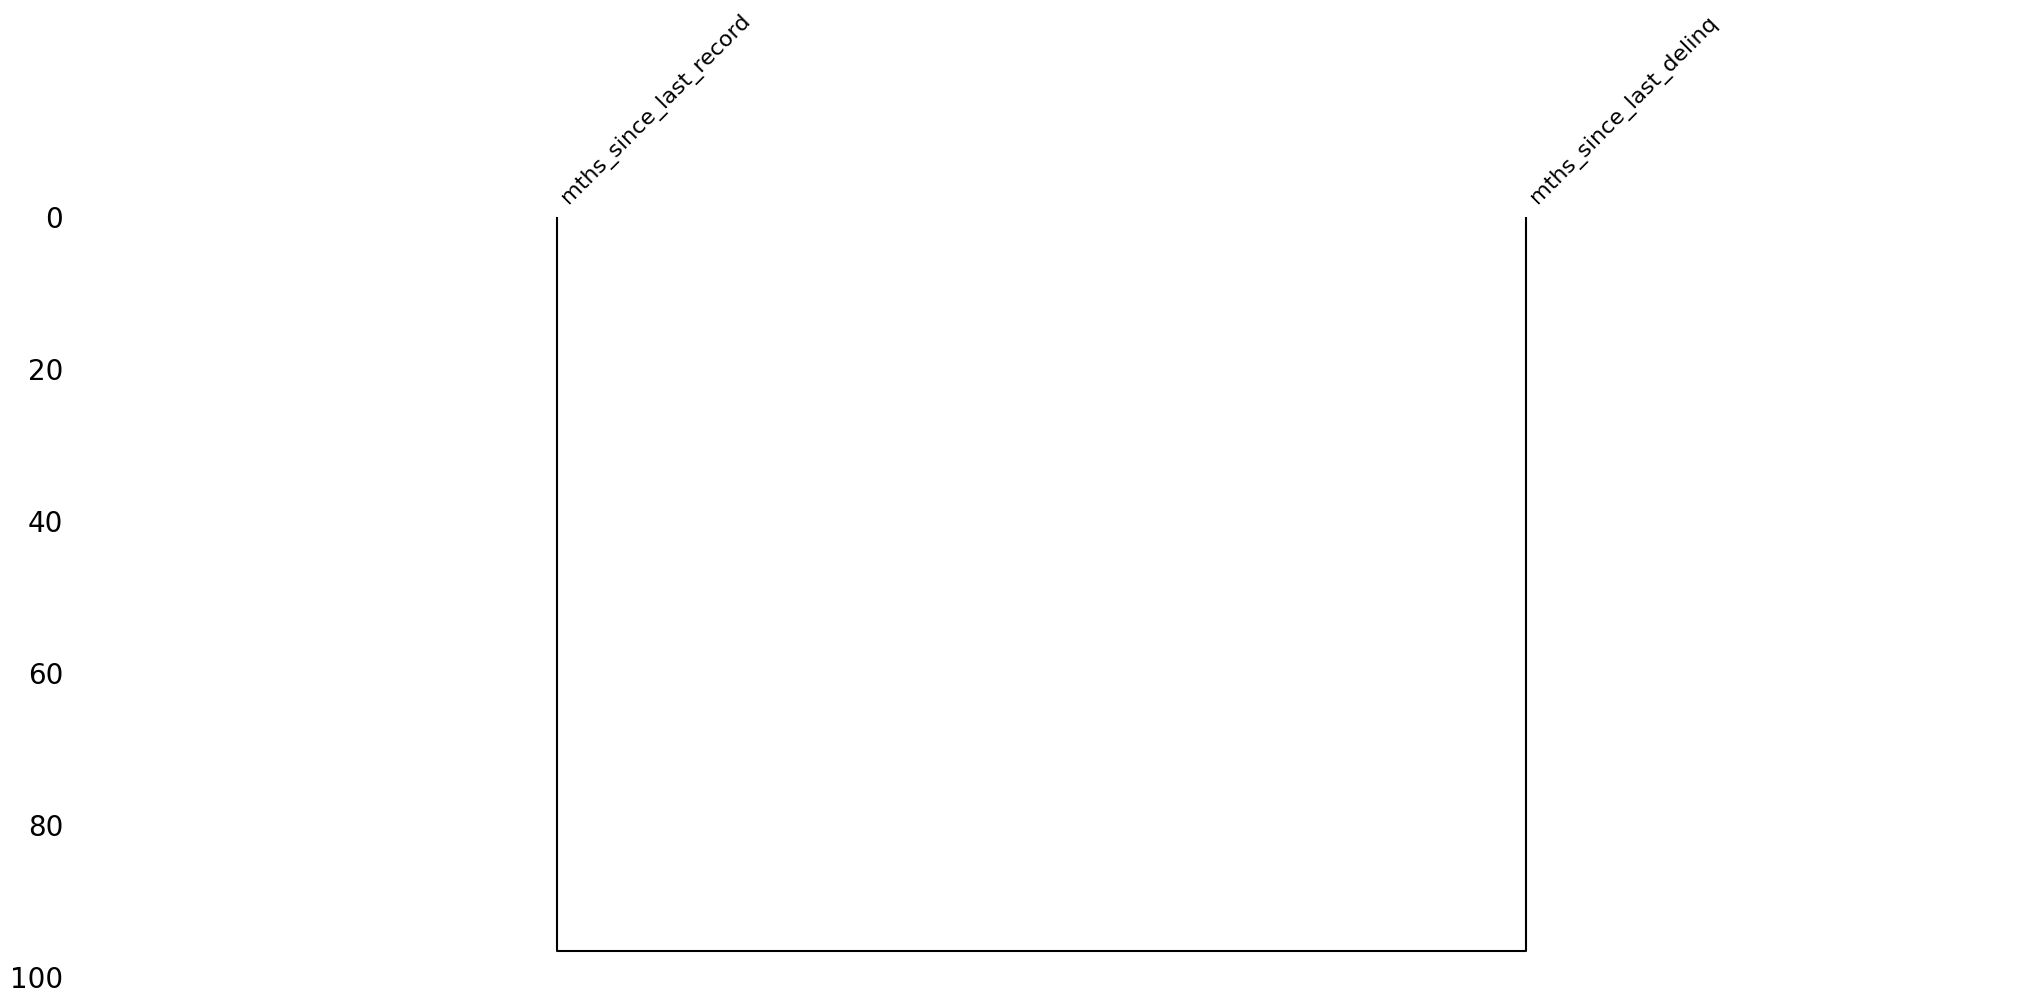

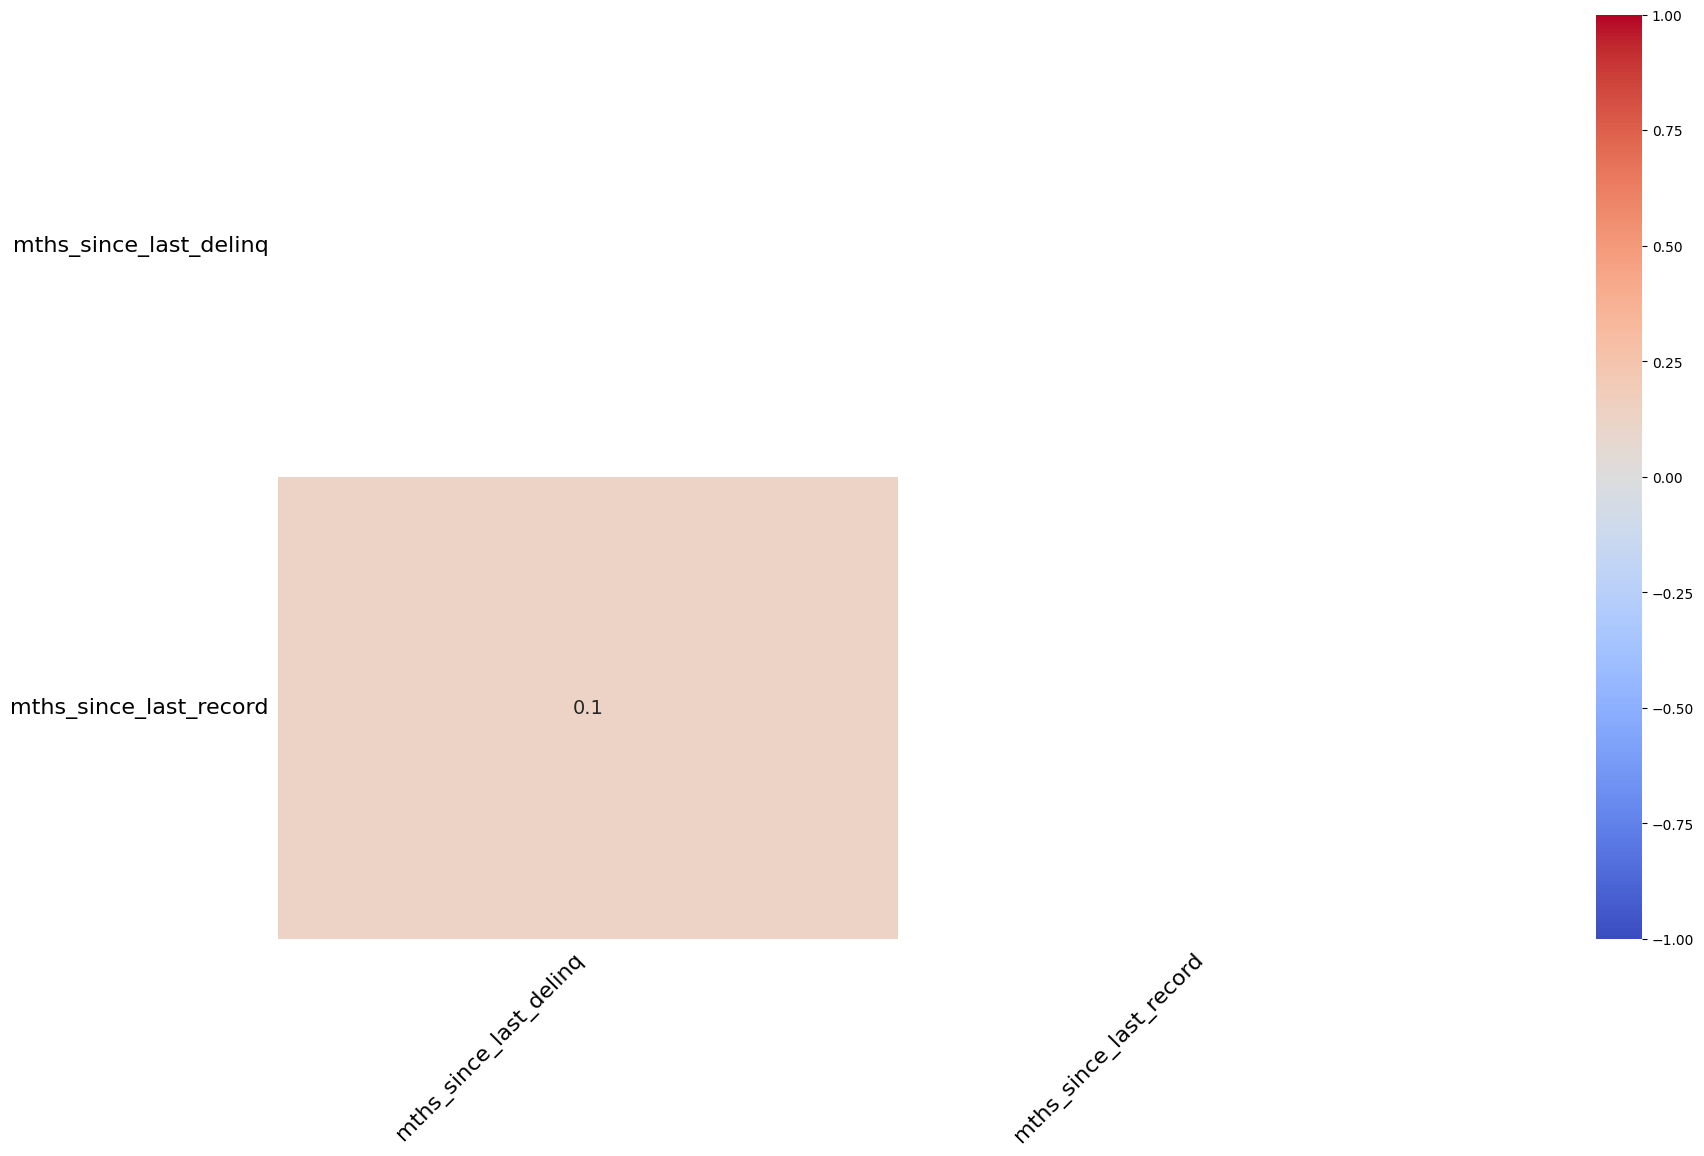

Columnas categóricas con nulos: ['emp_length']


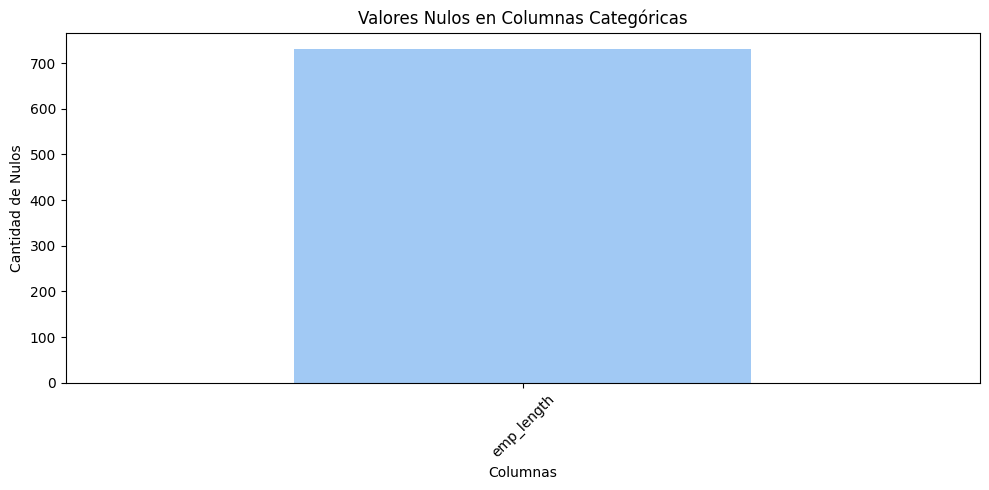

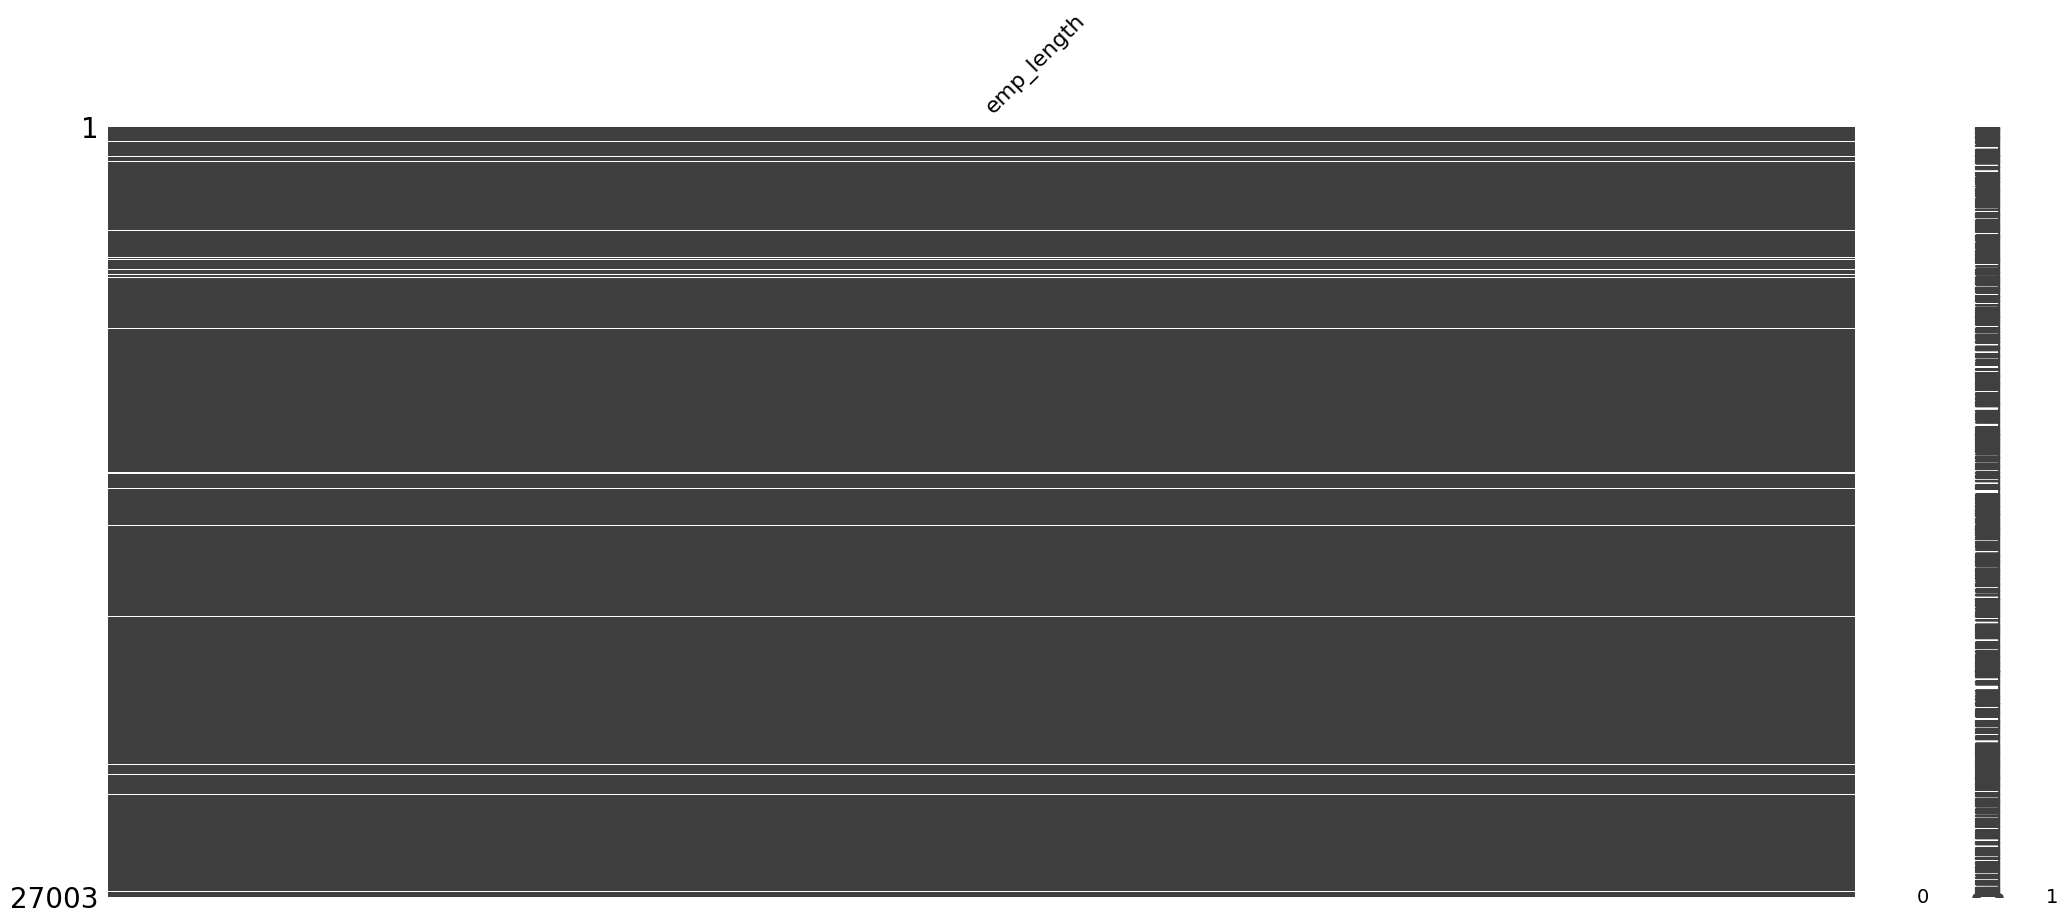

No se puede generar heatmap/dendrogram: menos de 2 columnas categóricas con nulos.


In [24]:
analizar_nulos(df, variables)

### GRAFICAS UNIVARIADAS

### Definiendo la Función

In [25]:
def analizar_univariantes(df, variables=None):
    print("\n### Análisis univariante ###")

    # Si pasas variables específicas, filtramos solo esas
    if variables is not None:
        df = df[variables]

    # Separar columnas numéricas y categóricas
    cols_numericas = df.select_dtypes(include=[np.number]).columns
    cols_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Análisis para numéricas
    if len(cols_numericas) > 0:
        print("\n=== Variables numéricas ===")
        for columna in cols_numericas:
            print(f"\nAnálisis de la columna: {columna}")
            print(df[columna].describe())

            fig, axes = plt.subplots(2, 3, figsize=(18, 10))

            sns.histplot(df[columna].dropna(), kde=False, ax=axes[0, 0], color='skyblue')
            axes[0, 0].set_title('Histograma')

            sns.kdeplot(df[columna].dropna(), ax=axes[0, 1], fill=True, color='orange')
            axes[0, 1].set_title('KDE Plot')

            sns.histplot(df[columna].dropna(), kde=True, ax=axes[0, 2], color='purple')
            axes[0, 2].set_title('Hist + Density')

            sns.boxplot(x=df[columna], ax=axes[1, 0], color='salmon')
            axes[1, 0].set_title('Boxplot')

            sns.stripplot(x=df[columna], ax=axes[1, 1], color='green')
            axes[1, 1].set_title('Strip plot')

            sns.violinplot(x=df[columna], ax=axes[1, 2], color='lightblue')
            axes[1, 2].set_title('Violin plot')

            plt.tight_layout()
            plt.show()
    else:
        print("\nNo se encontraron columnas numéricas.")

    # Análisis para categóricas
    if len(cols_categoricas) > 0:
        print("\n=== Variables categóricas ===")
        for columna in cols_categoricas:
            print(f"\nAnálisis de la columna: {columna}")
            print(df[columna].describe())

            conteo = df[columna].value_counts()

            fig, axes = plt.subplots(2, 2, figsize=(14, 10))

            conteo.plot(kind='bar', ax=axes[0, 0], color='lightgreen')
            axes[0, 0].set_title('Bar plot')

            conteo.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%')
            axes[0, 1].set_ylabel('')
            axes[0, 1].set_title('Pie chart')

            # Pareto chart
            pareto = conteo.cumsum() / conteo.sum()
            ax1 = axes[1, 0]
            ax2 = ax1.twinx()
            conteo.plot(kind='bar', ax=ax1, color='skyblue')
            pareto.plot(ax=ax2, color='red', marker='o')
            ax1.set_title('Pareto chart')
            ax2.set_ylim(0, 1.05)
            ax2.axhline(0.8, color='gray', linestyle='--')

            # Tree map
            squarify.plot(sizes=conteo.values, label=conteo.index, alpha=0.8, ax=axes[1, 1])
            axes[1, 1].set_title('Tree map')

            plt.tight_layout()
            plt.show()
    else:
        print("\nNo se encontraron columnas categóricas.")



### Análisis univariante ###

=== Variables numéricas ===

Análisis de la columna: mths_since_last_delinq
count    9608.000000
mean       35.700354
std        22.069853
min         0.000000
25%        18.000000
50%        34.000000
75%        52.000000
max       120.000000
Name: mths_since_last_delinq, dtype: float64


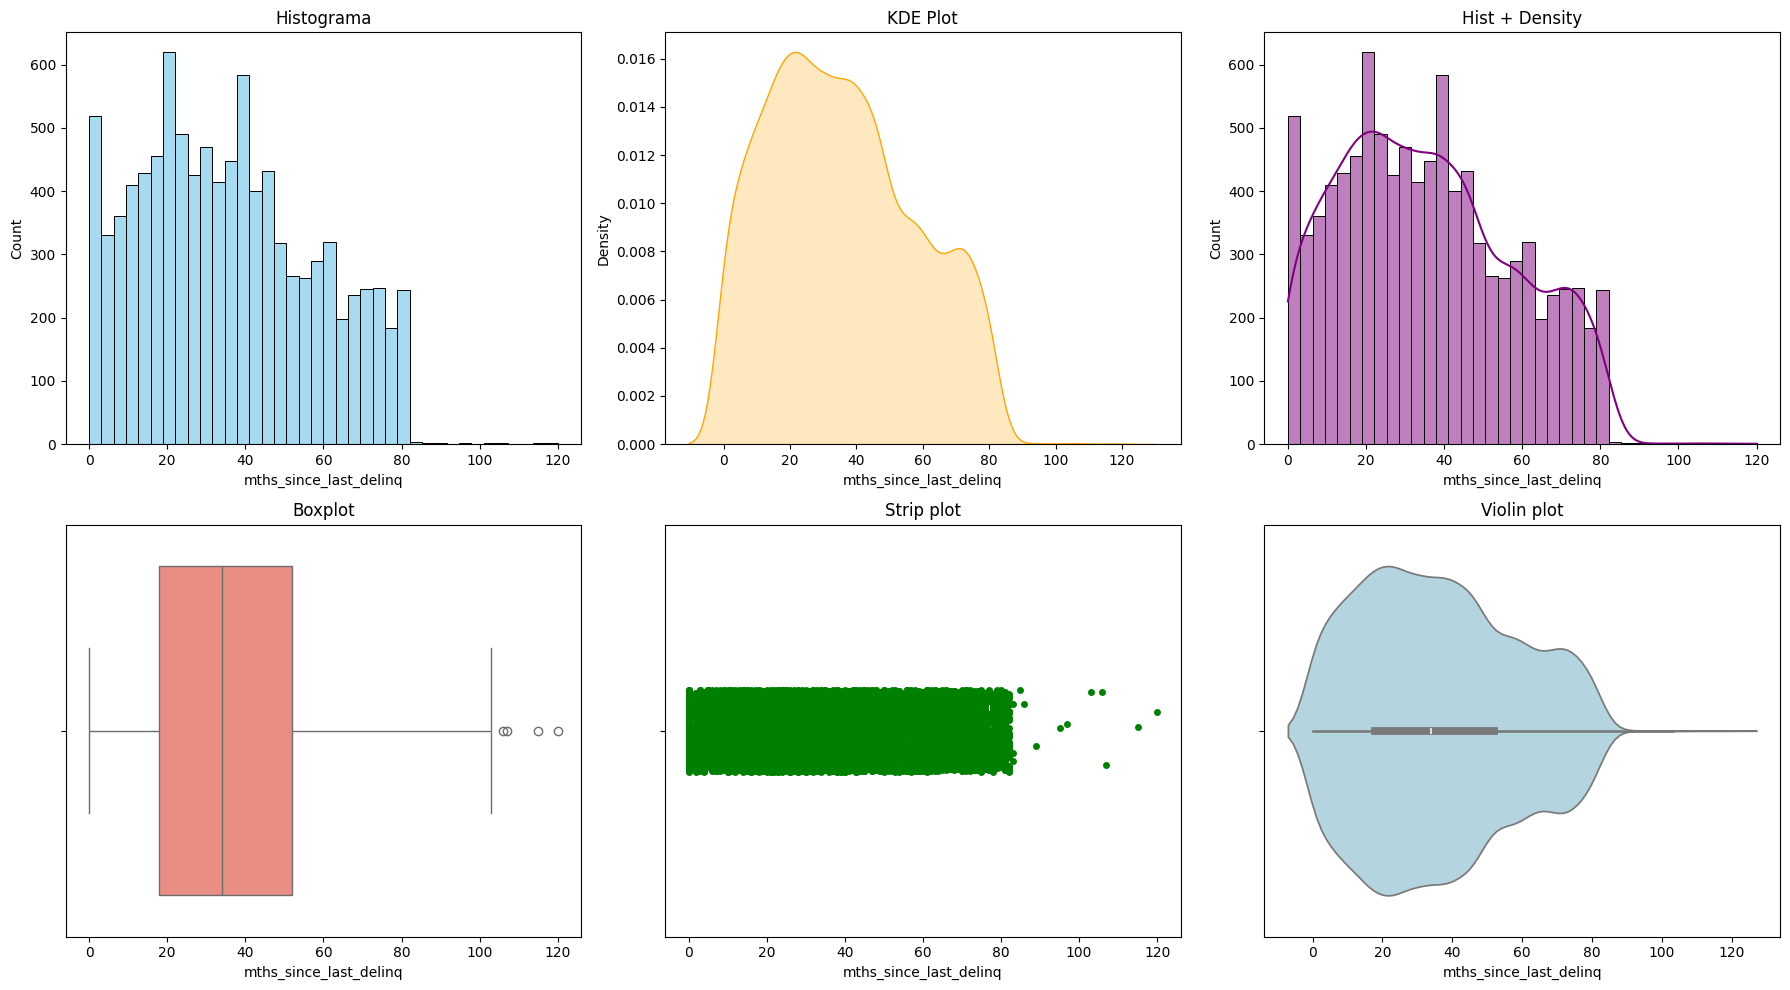


Análisis de la columna: mths_since_last_record
count    1938.000000
mean       68.994324
std        44.262656
min         0.000000
25%         8.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64


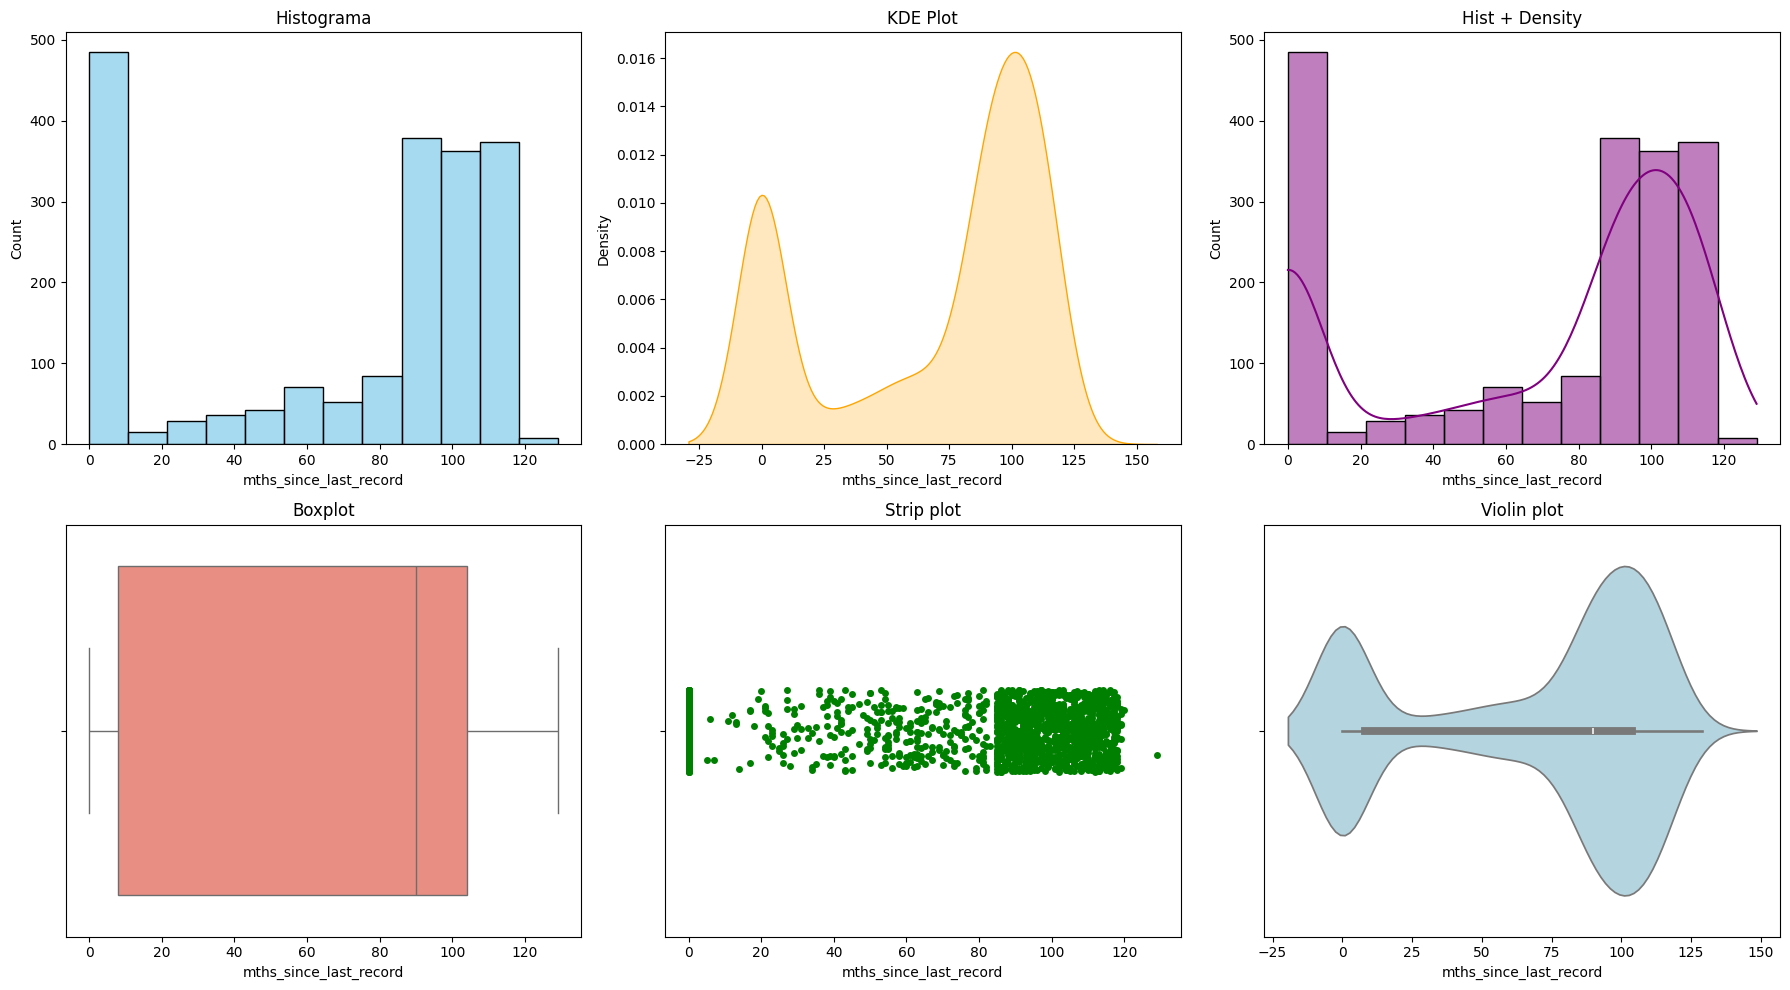


Análisis de la columna: total_pymnt
count    27003.000000
mean     11873.620566
std       8835.504507
min          0.000000
25%       5513.915437
50%       9689.960000
75%      16111.666885
max      58563.679930
Name: total_pymnt, dtype: float64


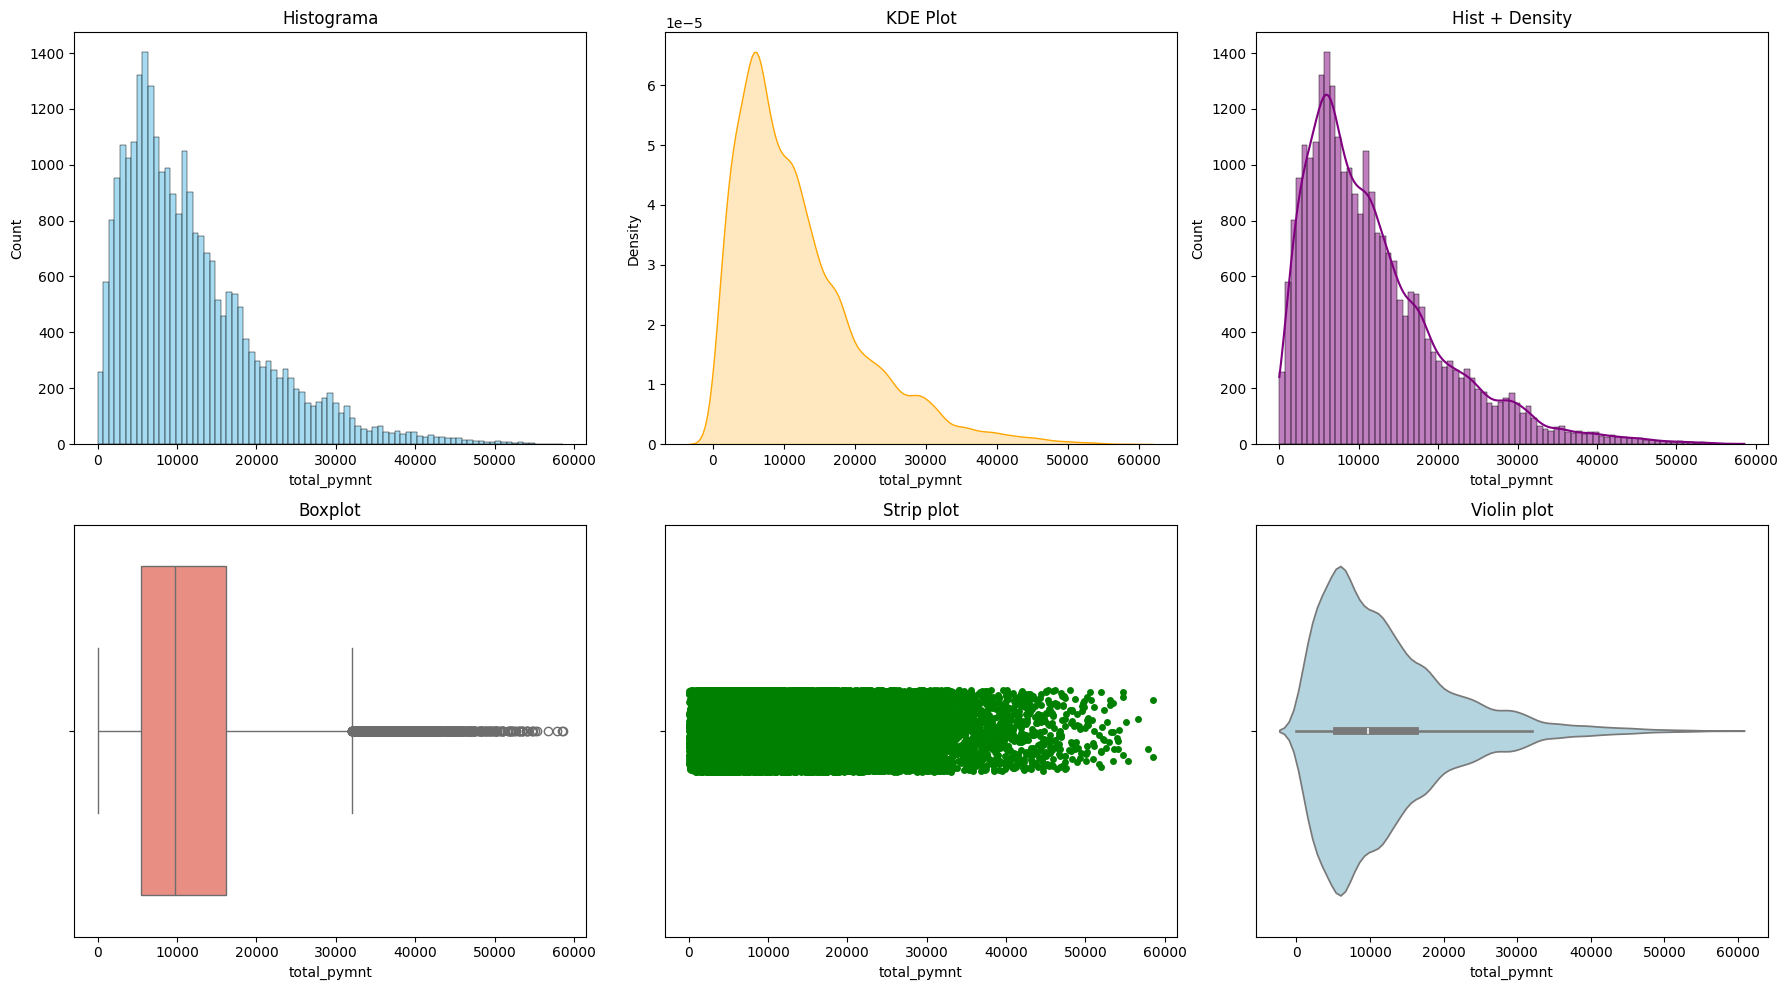


Análisis de la columna: total_pymnt_inv
count    27003.000000
mean     11278.169029
std       8723.445192
min          0.000000
25%       5019.195000
50%       9064.160000
75%      15336.595000
max      58563.680000
Name: total_pymnt_inv, dtype: float64


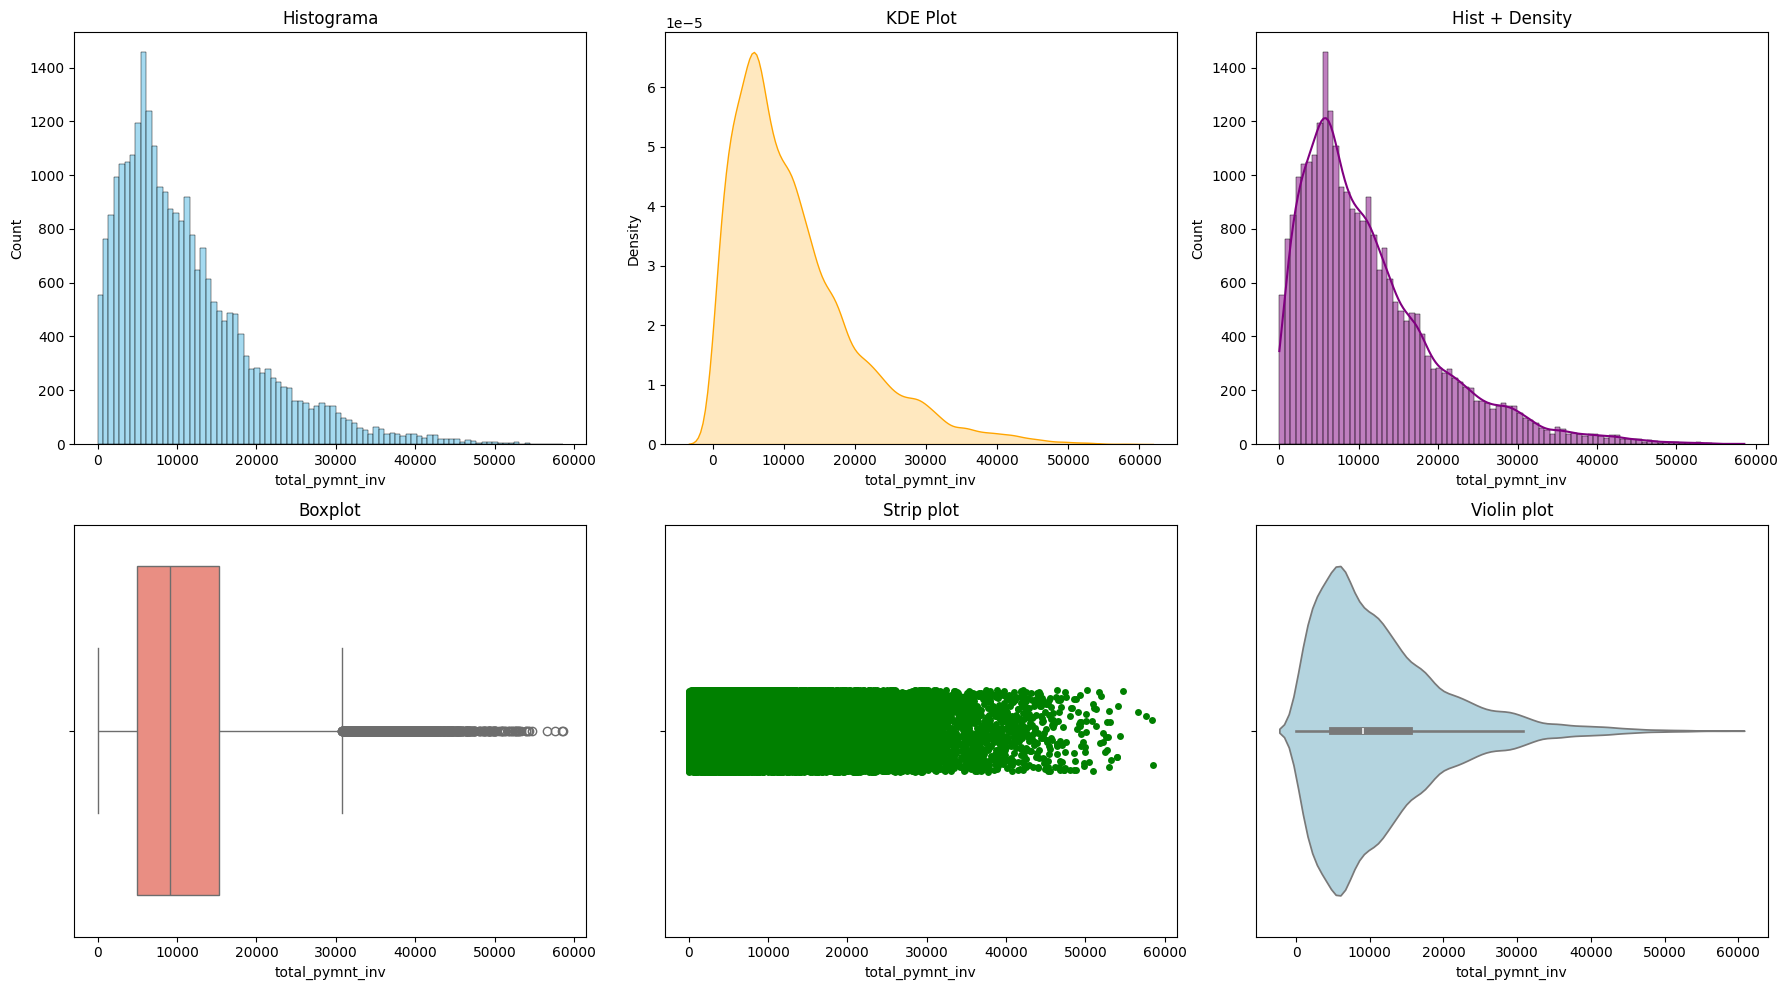


=== Variables categóricas ===

Análisis de la columna: grade
count     27003
unique        7
top           B
freq       8189
Name: grade, dtype: object


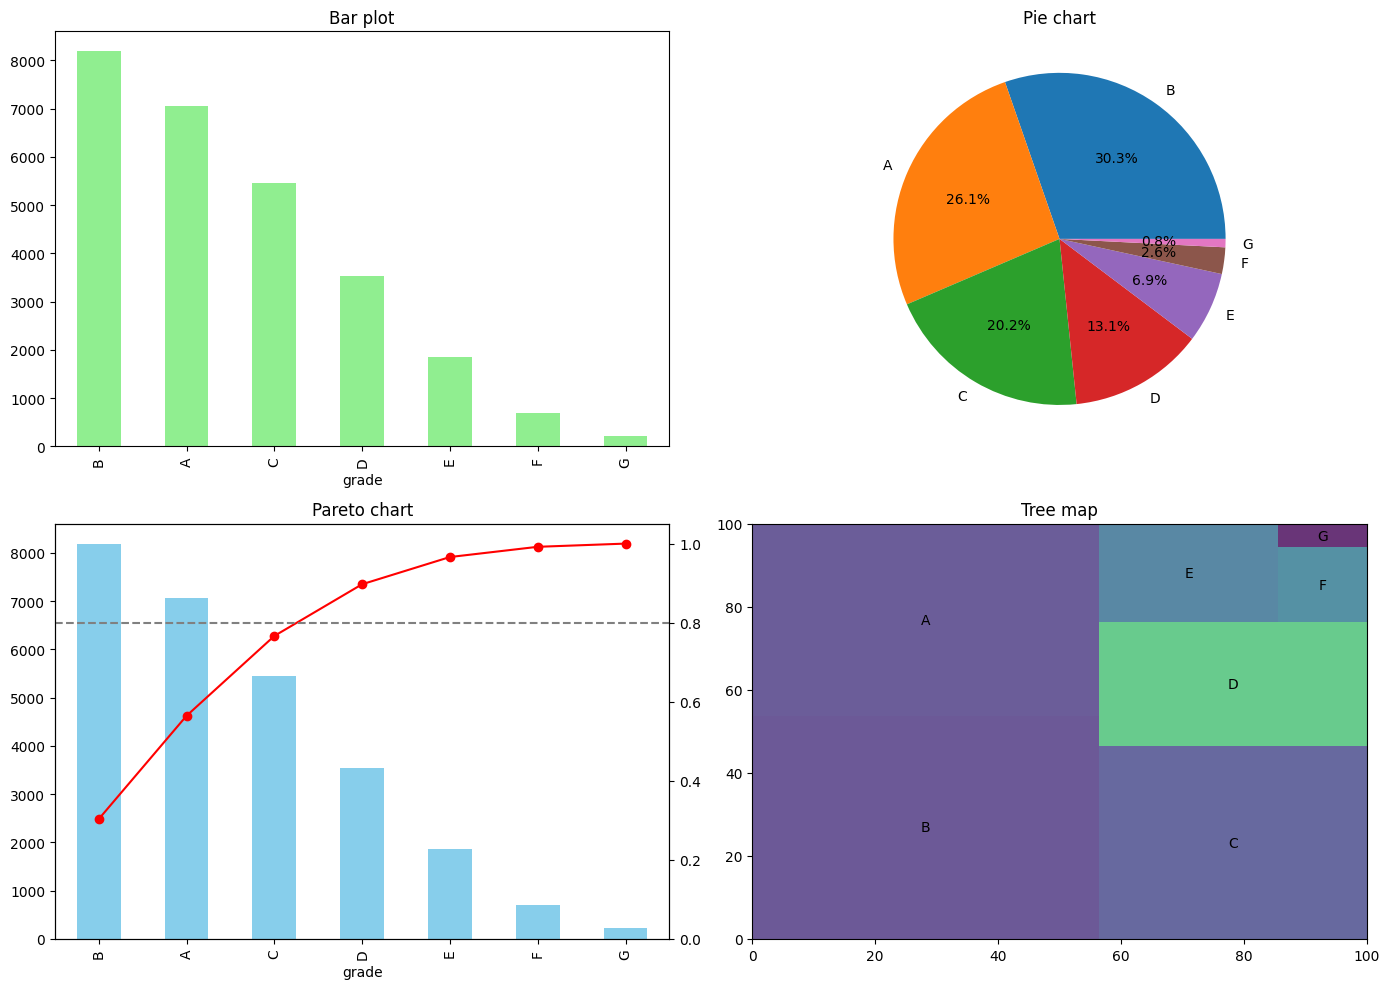


Análisis de la columna: sub_grade
count     27003
unique       35
top          A4
freq       1985
Name: sub_grade, dtype: object


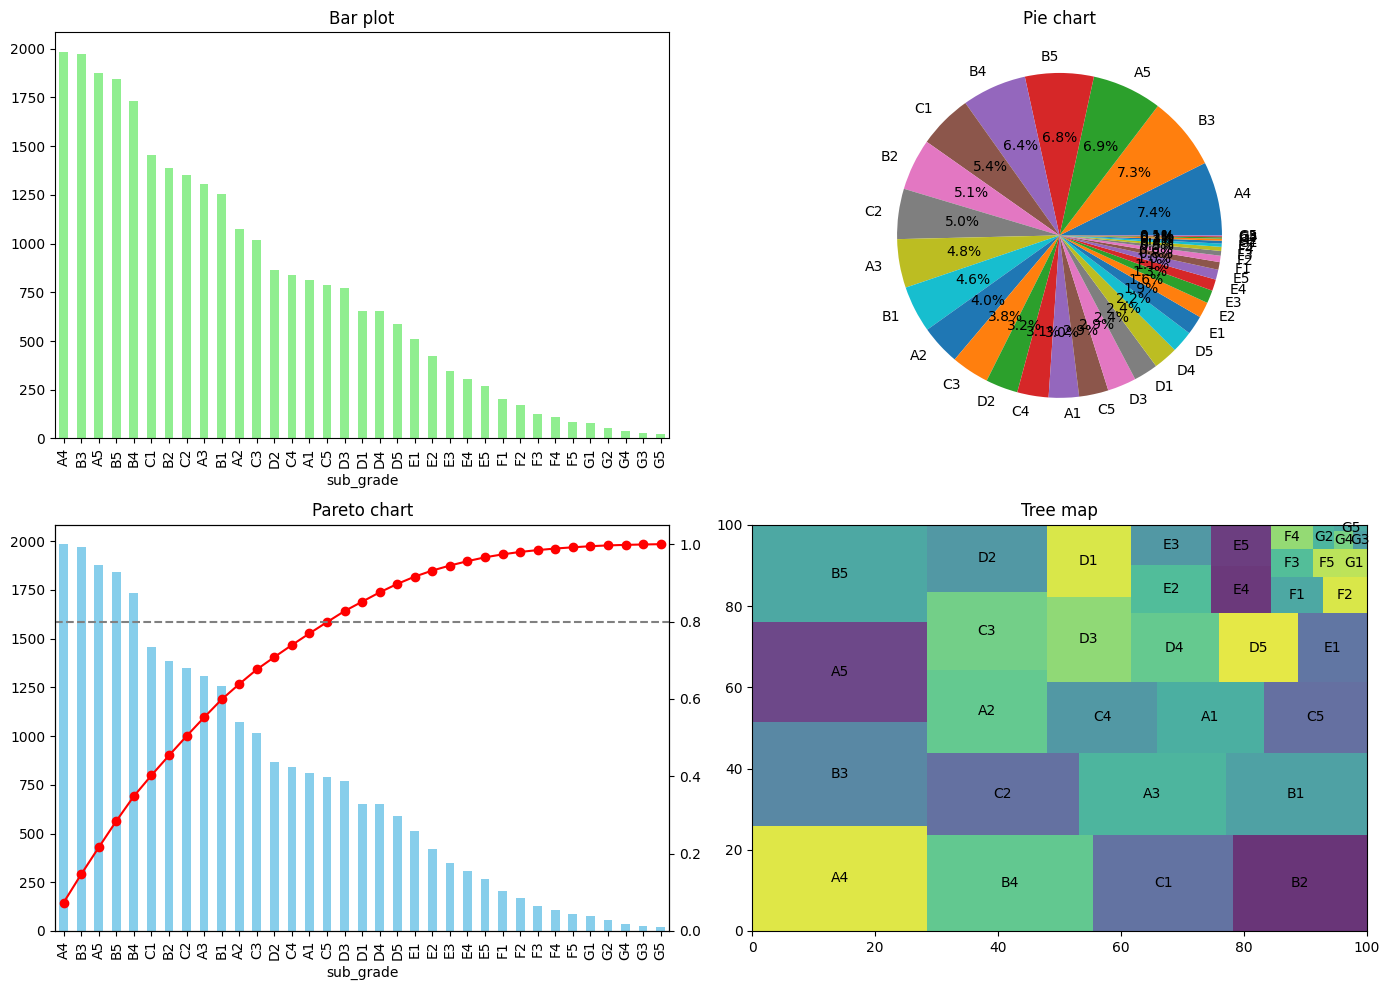


Análisis de la columna: emp_length
count         26273
unique           11
top       10+ years
freq           6016
Name: emp_length, dtype: object


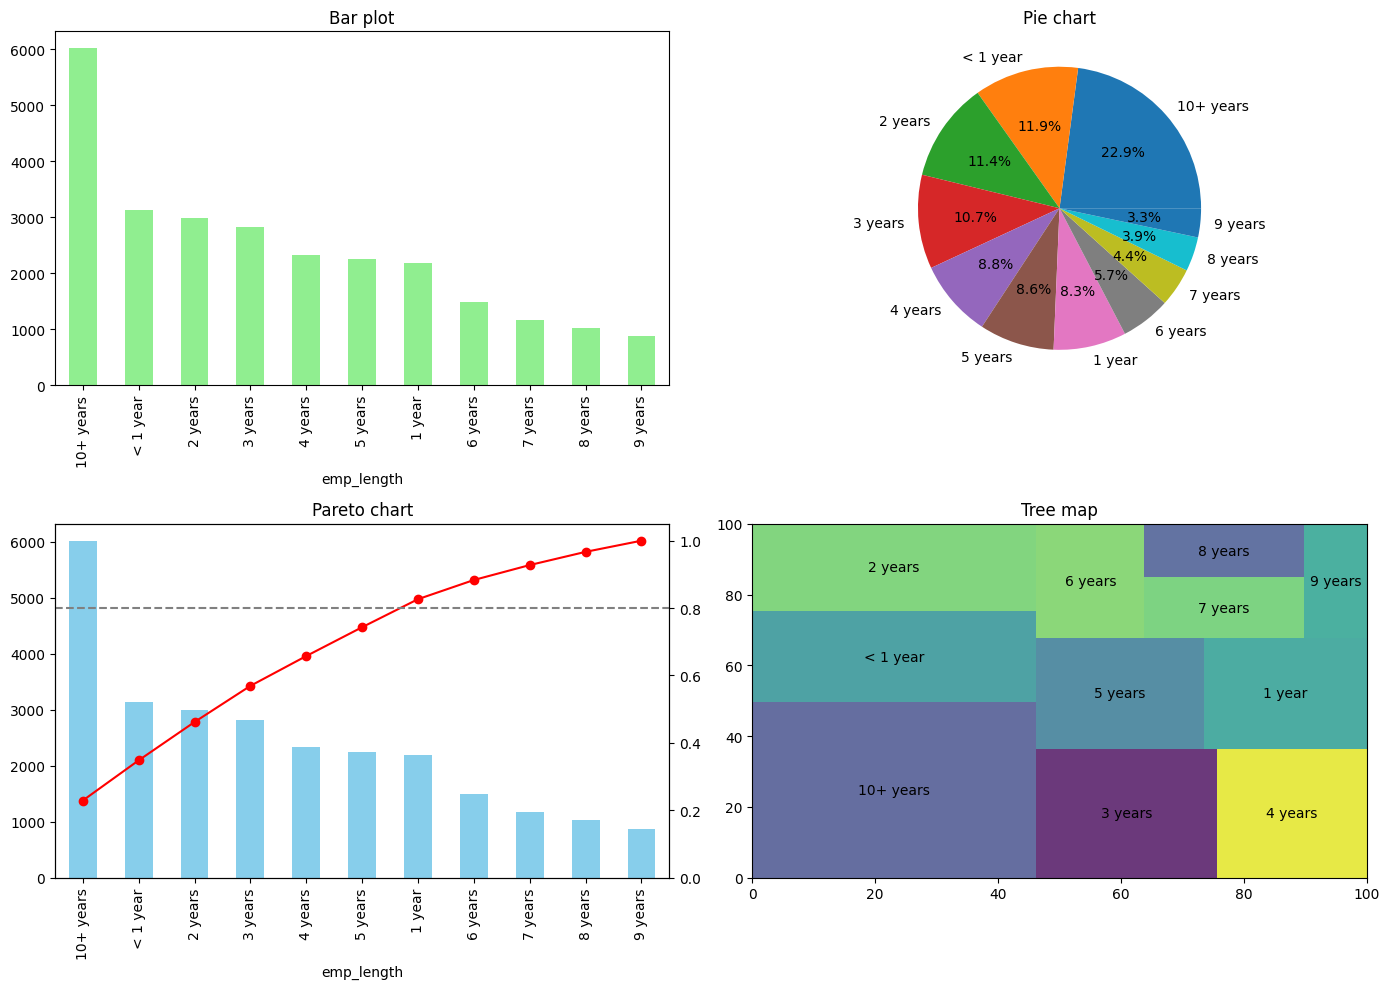

In [26]:
 analizar_univariantes(df, variables)